<a id='toc'></a>

## Fifty shades of OLS!

I'm deliberately using inconsistent naming convention and notation throughout this notebook just for the sake of being familiar with different representations of underlying concepts, especially when it comes to studying a single subject from multiple sources. Example: model parameters will be denoted as $\beta$ or $\theta$.

##### Table of contents

* <a href="#lab" style='color:#a52a2a'>Linear Algebra - Vector operations</a>
    * <a href="#dp" style='color:#dc143c'>Dot/Inner Product</a>
    * <a href="#id" style='color:#dc143c'>Identity matrix</a>
    * <a href="#mi" style='color:#dc143c'>Matrix Inverse</a>
    * <a href="#nor" style='color:#dc143c'>Norms</a>
* <a href="#mlr" style='color:#a52a2a'>Multiple Linear Regression</a>
    * <a href="#reg" style='color:#dc143c'>Regularization</a>
    * <a href="#php" style='color:#dc143c'>Predicting house prices</a>
    * <a href="#mols" style='color:#dc143c'>Multiple OLS regression from scratch</a>
    * <a href="#lvc" style='color:#dc143c'>Loss vs Cost functions</a>
    * <a href="#sfe" style='color:#dc143c'>Simple feature engineering</a>
    * <a href="#gen" style='color:#dc143c'>Generalizability: evaluating performance out of sample</a>
    * <a href="#evr" style='color:#dc143c'>Errors vs Residuals</a>
* <a href="#slr" style='color:#a52a2a'>Simple linear regression</a>
    * <a href="#cvc" style='color:#dc143c'>Covariance vs Correlation</a>
    * <a href="#sols" style='color:#dc143c'>Simple OLS regression from scratch</a>
* <a href="#gd" style='color:#a52a2a'>Gradient Decent (GD)</a>
    * <a href="#gds" style='color:#dc143c'>GD simple OLS from scratch</a>
    * <a href="#gdm" style='color:#dc143c'>GD multiple OLS from scratch</a>
* <a href="#bs" style='color:#a52a2a'>Bayes' theorem</a>
    * <a href="#blr" style='color:#dc143c'>Bayesian linear regression</a>
    * <a href="#blrs" style='color:#dc143c'>Bayesian regression from scratch</a>
    * <a href="#mcmc" style='color:#dc143c'>Markov chain Monte Carlo sampling</a>
* <a href="#capm" style='color:#a52a2a'>Capital Asset Pricing Model (CAPM)</a>

In [1]:
# the good stuff

import copy
import pandas as pd
import numpy as np
from scipy.stats import multivariate_normal
from scipy.stats import norm
from scipy.stats import spearmanr
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression, Ridge
import bambi  as bmb
import arviz as az
import seaborn as sns
from matplotlib import pyplot as plt

# from jupyterthemes import jtplot
# jtplot.style(context='notebook', ticks=True, grid=False)

%matplotlib inline

<a id='lab'></a>

### Linear Algebra - Vector operations

Linear algebra is the study of vectors and certain algebra rules to manipulate vectors which is a corner stone in machine learning models. We’re gonna discuss basic operations on vectors and matrices which will be utilized throughout this notebook.

#### Vectors

In general, vectors are special objects that can be added together and multiplied by [scalars](https://en.wikipedia.org/wiki/Scalar_(mathematics)) to produce another object of the same kind. From an abstract mathematical viewpoint, any object that satisfies these two properties can be considered a vector.

In [2]:
# vector
v = np.array([2, 4, 5, 6])

v

array([2, 4, 5, 6])

In [3]:
# column vector
v_c = v.T

v_c

array([2, 4, 5, 6])

In [4]:
# dimensions
v.shape, v_c.shape

((4,), (4,))

Note that when we transposed (.T) the vector nothing happens, because in numpy vectors are always represented as one dimensional arrays. This is important to consider when reading mathematical notation because sometimes vectors are assumed to be represented as columns and will be notated as $v^t$ when doing matrix-vector multiplication for example; which won't be necessary when implemented in python.

In [5]:
# multiplying by scalar (number)
v * 2

array([ 4,  8, 10, 12])

In [6]:
# adding two vectors
v + v_c

array([ 4,  8, 10, 12])

In [7]:
# multiplying two vectors
v * v_c

array([ 4, 16, 25, 36])

Operations are done element-wise.

**<a href="#toc" style='color:#00ffff'>Table of contents</a>**

<a id='dp'></a>

#### Multiplication (Dot/Inner Product)

Vector-Vector dot product is $\sum_{i=0}^{n-1} u_i.v_i$ : Sum of $i^{th}$ element of first vector multiplied by $i^{th}$ element of $2^{nd}$ vector (starting at 0 because python is zero indexed), it produce a scalar (number) unlike the previous multiplication of two vectors which produced an array of [4, 16, 25, 36].

In [8]:
# dot product vec-vec
v.dot(v_c), sum(v * v_c)

(81, 81)

In [9]:
# matrix
M = np.array([
    [2, 4, 5, 6],
    [1, 2, 1, 2],
    [3, 1, 2, 1],
])

M.shape

(3, 4)

Matrices are two dimensional sequence of numbers, think of it as a table having rows (1st dimension) and columns (2nd dimension). They are usually denoted in bold capital letters, unlike vectors that are denoted as bold small letters.

Our Matrix *M* has 3 rows and 4 columns.

In [10]:
# matrix transpose
M.T

print(M.T, '\n', '-' * 10, '\n', M.T.shape, sep = '')

[[2 1 3]
 [4 2 1]
 [5 1 2]
 [6 2 1]]
----------
(4, 3)


Transposing matrix flips it upside down, rows becoms columns and vice versa.

In [11]:
# Matrix-Vector dot product

def matrix_vector_dot(M, v):
    
    # m*n matrix and n vector, both n should be equal
    assert M.shape[1] == v.shape[0]
    
    # number of rows in the matrix
    n_rows = M.shape[0]
    
    # array to hold result 
    # of shape m rows
    result = np.zeros(n_rows)
    
    for m in range(n_rows):
        # sum of ith element of each row in matrix multiplied by ith element in the vector
        result[m] = sum(M[m] * v)
        
    return result

matrix_vector_dot(M, v)

array([81., 27., 26.])

In [12]:
# using numpy
M.dot(v)

array([81, 27, 26])

In [13]:
# # Invalid multiplication
# M_ = M[:,1]

# M_.dot(v)

Dot product of Matrix-vector is basically a dot product of vector-vector, it’s important to note that:
- Matrix is of m * n dimensions
- Vector is of n dimension
- Result array is of m dimension
- If n in both Matrix and vector do not match, multiplication can't take place

In [14]:
# new matrix
V = np.array([
    [1, 1, 2],
    [0, 0.5, 1], 
    [0, 2, 1],
    [2, 1, 0],
])

V.shape

(4, 3)

In [15]:
# Matrix-Matrix dot product

def matrix_matrix_dot(M, V):
    
    # m*n matrix and n*k matrix, both n should be equal
    assert M.shape[1] == V.shape[0]
    
    n_row = M.shape[0]
    n_col = V.shape[1]
    
    # array to hold result 
    # of shape m*k 
    result = np.zeros((n_row, n_col))
    
    for k in range(n_col):
        
        # each column in V
        vi = V[:, k]
        
        # matrix-vector multiplication
        Uvi = matrix_vector_dot(M, vi)
        result[:, k] = Uvi 

    return result

matrix_matrix_dot(M, V)

array([[14. , 20. , 13. ],
       [ 5. ,  6. ,  5. ],
       [ 5. ,  8.5,  9. ]])

In [16]:
# using numpy
M.dot(V)

array([[14. , 20. , 13. ],
       [ 5. ,  6. ,  5. ],
       [ 5. ,  8.5,  9. ]])

We can conclude that matrix-matrix multiplication is a form of matrix-vector multiplication using columns and rows from each matrix. Where:

- n-dimensions should be equal in terms of columns of 1st matrix and rows of 2nd one. 
- The result is an m * k matrix where m is number of rows from 1st matrix and k is number of columns from 2nd one

If you are still confused check [here](http://matrixmultiplication.xyz/) and you'll never forget how it is done.

**<a href="#toc" style='color:#00ffff'>Table of contents</a>**

<a id='id'></a>

#### Identity matrix ($I$)
It's like the number 1, dot product of a matrix and its identity equals to the original matrix.

In [17]:
# Identity matrix
I = np.eye(3)

I

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [18]:
# Matrix dot I
V.dot(I)

array([[1. , 1. , 2. ],
       [0. , 0.5, 1. ],
       [0. , 2. , 1. ],
       [2. , 1. , 0. ]])

**<a href="#toc" style='color:#00ffff'>Table of contents</a>**

<a id='mi'></a>

#### Matrix Inverse ($M^{-1}$)

Dot product of a matrix and its inverse is identity matrix. Only square matrix have an inverse (not always true as we will see later), square matrix is where n rows equal n columns.

In [19]:
# V is not a square matrix so we select only first 3 rows as it already has 3 columns
V_ = V[[0, 1, 2]]
V_

array([[1. , 1. , 2. ],
       [0. , 0.5, 1. ],
       [0. , 2. , 1. ]])

In [20]:
# Inverse
V_inv = np.linalg.inv(V_)
V_inv

array([[ 1.        , -2.        ,  0.        ],
       [ 0.        , -0.66666667,  0.66666667],
       [ 0.        ,  1.33333333, -0.33333333]])

In [21]:
# Matrix dot Inverse
V_inv.dot(V_)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

**<a href="#toc" style='color:#00ffff'>Table of contents</a>**

<a id='nor'></a>

#### Norms ($||v||$)

Norms represents the length (magnitude) of vector, it summarizes the distance of the vector from the origin. Most popular norms are:

- $L^1$ norm $||v||_1$: sum of absolute vector values. 
- $L^2$ norm (Euclidean norm) $||v||_2$: square root of the sum of squared vector values.
- $L^{inf}$ norm (Max norm) $||v||_{inf}$: maximum value of the vector.

In [22]:
# L^1 norm

sum(abs(v)), np.linalg.norm(v, 1)

(17, 17.0)

In [23]:
# L^2 norm

np.sqrt(sum(v**2)), np.linalg.norm(v, 2)

(9.0, 9.0)

In [24]:
# L^inf norm

max(v), np.linalg.norm(v, np.inf)

(6, 6.0)

**<a href="#toc" style='color:#00ffff'>Table of contents</a>**

<a id='mlr'></a>

## Multiple Linear Regression

In Function approximation problems the goal is to construct a model generating predictions of the response (dependent variable) as a function of the attributes/features (independent variables).

Multiple linear regression is a linear approach for modeling the relationship between a scalar (number) response and one or more attributes. Our goal is to infer the underlying function that generated the data using a linear combination of the input features such that we can predict function values.

The general formula for multiple linear regression is:

$y$ = $\beta_0$ + $\beta_1$$x_1$ + $\beta_2$$x_2$ + ... + $\beta_n$$x_n$ + $ε$

where

- $\beta_0$ is the intercept
- $\beta_1$ to $\beta_n$ are as coefficients/model parameters/weights/slope; can also be denoted as theta ($\theta$)
- $x_1$ to $x_n$ are the features/attributes/independent variables of our dataset
- $ε$ are **unobserved** error/noise term, it captures all other factors which influence the dependent variable $y$ other than the regressors $x$. Our goal is to construct a model that minimize $ε$; being unobserved means that it needs to be estimated using loss/cost functions as a measure of minimization.

We can simplify the notation using matrix/vector formulation so that equation becomes more compact:

$Y$ = $X$$\beta$ + $ε$.

Where $X$$\beta$ is the dot product of feature matrix and coefficients vector

Note that $X$ now contains $x_0$ vector filled with a series of 1s [1, 1, 1, ..] this is to allow for an intercept in the regression; it will be multiplied by $\beta_0$ (intercept). That's why we add an additional vector (column) in the feature matrix (table) filled with 1s and name it 'intercept' because it mirrors the calculated intercept.

But how exactly can we estimate the coefficients ($\beta$) values? One way to do it is using [Least squares](https://en.wikipedia.org/wiki/Least_squares) method and the most popular variant being Ordinary Least Squares (OLS).

<img class="aligncenter" src="https://drive.google.com/uc?id=1tQOJytLSFgdNcHqP5iiZdY-3Yx3l0Czu" width="400" height="400">

In a nutshell the OLS algorithm minimizes the sum of squares of residuals (SSR a.k.a RSS); being the difference between an observed value (red dots) and the fitted value provided by a model (black dots on the blue line), when we minimize SSR our predictions are the closest possible to actual values. In the above graph the model is the blue line and the orientation is controlled by the parameters we discussed earlier (slope and intercept). 

So given a feature matrix (table of all features) how can we derive the coefficients that minimize SSR? by using the following formula:

- $\beta$ = ($X^{t}$$X$)$^{-1}$$X^{t}$$Y$

*We are not gonna discuss [proof](https://statproofbook.github.io/P/mlr-ols) of this formula (a.k.a Normal Equation), because simply we are not gonna go through the full process of such derivation rather directly use final form.*

Let's break down the formula and understand its structure intuitively:

- Linear regression function is $Y$ = $X$$\beta$
- Due to the absence of $X^{-1}$ for $X$ as $X$ is [rarely](https://en.wikipedia.org/wiki/Invertible_matrix#:~:text=Non%2Dsquare%20matrices%20(m%2D,such%20that%20BA%20%3D%20In) an invertible/square matrix, we try to invert $X$. This is done by multiplying both sides first by ($X^{t}$) resulting in a [gram matrix](https://en.wikipedia.org/wiki/Gram_matrix) $X^{t}$$X$ for which an inverse [usually](https://en.wikipedia.org/wiki/Invertible_matrix#:~:text=A%20square%20matrix%20that%20is%20not%20invertible%20is%20called%20singular%20or%20degenerate.%20A%20square%20matrix%20is%20singular%20if%20and%20only%20if%20its%20determinant%20is%20zero) exists. We're now left with $X^{t}$$X$$\beta$ = $X^{t}$$Y$ 
- Inverse $X^{t}$$X$ and multiply both sides by ($X^{t}$$X$)$^{-1}$ so $\beta$ = ($X^{t}$$X$)$^{-1}$$X^{t}$$Y$. Remember that dot product of $X^{t}$$X$ and it's inverse ($X^{t}$$X$)$^{-1}$ is the identity matrix $I$, thus $X^{t}$$X$ on left hand side of the equation is cancelled out.

The outcome of the algorithm is $\beta$ vector that can be used to make predictions using the regression formula. Let's look at some practical application.

In [25]:
# Generating predictions using Linear Regression for 
# a single sample with multiple features

# feature vector
xi = np.array([5, 7, 8])

# intercept
w0 = 2

# weights/coefficients
w = np.array([3, 4, 5])

def linear_regression_vector(xi):
    pred = w0 + xi.dot(w)
    return pred

print('function result:', linear_regression_vector(xi), '\n' ,'-' * 20, '\n' , 'linear equation: y = w0 + sum(w*xi) = ', 
      2 + 5 * 3 + 7 * 4 + 8 * 5, sep = '')

function result:85
--------------------
linear equation: y = w0 + sum(w*xi) = 85


In [26]:
# shape of vectors
print(xi.shape, w.shape)

(3,) (3,)


So for a single feature vector (sample/observation) denoted as $x_{i}$ we are able to compute the predictions using vector multiplication. Our linear equation (model) is the following:

$\hat{y}$ = $w_{0}$ + $\sum_{j=0}^{n-1} w_{j}x_{ij}$

In [27]:
# generating predictions using compact regression equation

# adding 1 to feature vector
xi_comp = np.insert(xi, 0, 1) 

# adding intercept to weights vector
w_comp = np.insert(w, 0, w0)

print('feature vector:', xi_comp, '\n' ,'-' * 20, '\n' , 'weights vector:', w_comp, '\n' ,'-' * 20, '\n' ,)

def linear_regression_vector_comp(xi):
    # using numpy to calculate dot product
    pred = xi_comp.dot(w_comp)
    return pred

print('function result:', linear_regression_vector_comp(xi), '\n' ,'-' * 20, '\n' , 'linear equation y = w_comp.xi_comp = ', 
      2 * 1 + 5 * 3 + 7 * 4 + 8 * 5, sep = '')

feature vector: [1 5 7 8] 
 -------------------- 
 weights vector: [2 3 4 5] 
 -------------------- 

function result:85
--------------------
linear equation y = w_comp.xi_comp = 85


So predictions are basically the dot product of features and weights vectors.

Note that we haven't calculated model parameters (bias and weights, aka theta $\theta$) yet rather using hard coded ones to demonstrate the role of linear algebra in the prediction process; let’s do predictions using the entire feature matrix (all samples) then we discuss how to calculate $\theta$.

In [28]:
# Generating predictions using Linear Regression for 
# a feature matrix

# Instantiate feature matrix
X = np.array([[1, 1, 2, 3], [1, 4, 5, 6], [1, 7, 8, 9]])

def linear_regression_matrix_comp(X):
    pred = X.dot(w_comp)
    return pred

linear_regression_matrix_comp(X)

array([ 28,  64, 100])

Generating predictions for an entire matrix feature is an act of matrix - vector multiplication. It's time now to discuss the calculation of model parameters.

In [29]:
# dimension of feature matrix
X.shape

(3, 4)

X is not a square matrix, an inverse does not exist. Let's check.

In [30]:
# # Inverting X - produce error
# np.linalg.inv(X)

In [31]:
# Calculating the Gram Matrix
XTX = X.T.dot(X)
XTX

array([[  3,  12,  15,  18],
       [ 12,  66,  78,  90],
       [ 15,  78,  93, 108],
       [ 18,  90, 108, 126]])

In [32]:
# # Inverting Gram Matrix - produce error
# XTX_inv = np.linalg.inv(XTX)
# XTX_inv

In [33]:
# Calculating the Determinant of
# gram matrix's inverse
np.linalg.det(XTX)

0.0

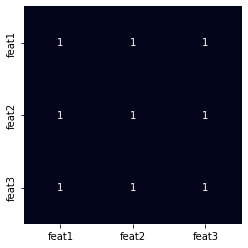

In [34]:
# Visualizing correlation among features
sns.heatmap(pd.DataFrame(X[:,1:], columns = ['feat1', 'feat2', 'feat3']).corr(), square=True, annot=True, cbar=False);

We tried to invert the Gram matrix but got an error, singular matrix is a non-invertible matrix; not all square matrix are invertible!

This might be caused by several reasons among which are:
- Absence of a linear independence known as [Multicolinarity](https://en.wikipedia.org/wiki/Multicollinearity), it is when two or more features are highly correlated. If there is severe (but not perfect) multicollinearity, $X^{t}$$X$ is difficult to invert. In the example above, our feature matrix $X$ is perfectly correlated thus $X^{t}$$X$ cannot be inverted.
- If the [Determinant](https://en.wikipedia.org/wiki/Determinant) = 0.

In [35]:
# Instantiate a feature matrix with less correlated features
X = np.array([[1, 1, 2, 3], 
              [1, 4, 5, 6], 
              [1, 10, 6, 3], 
              ])

# Instantiate target values
y = [8, 12, 15]

# Calculating the Gram Matrix
XTX = X.T.dot(X)

# Calculating the Determinant 
print(np.linalg.det(XTX))

# Inverting Gram Matrix
XTX_inv = np.linalg.inv(XTX)

# Check dot product result in an Identity matrix
XTX.dot(XTX_inv).round()

5.7553961596568115e-12


array([[ 1.,  0.,  0., -0.],
       [-0.,  1.,  0.,  0.],
       [-0.,  1.,  1.,  0.],
       [-0., -0.,  1.,  1.]])

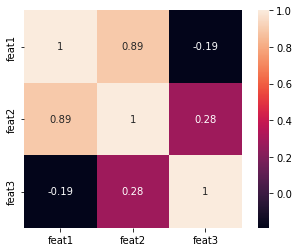

In [36]:
# Visualizing correlation among features
sns.heatmap(pd.DataFrame(X[:,1:], columns = ['feat1', 'feat2', 'feat3']).corr(), square=True, annot=True);

Note how $X^{t}$$X$ is invertible without perfect multicollinearity, however, we still have some highly correlated features (feat1 and feat2) and this produces unstable regression estimates and large standard error.

We are calculating the determinant and identity matrix just for demonstration. Our Final step now is to calculate weights (aka coefficients, theta, model parameters):

$β$ = ($X^{t}$$X$)$^{-1}$$X^{t}$$Y$

In [37]:
# Calculate weights
w = XTX_inv.dot(X.T).dot(y)
w

array([12.78125 ,  2.375   , -0.625   ,  0.890625])

Intercept is the first scaler (12.7), feature weights/coefficients are the rest. If we are to interpret the results we'd say that:
- Knowing nothing about feature values, our model estimates average $y$ to be 12.7 if x = 0.
- We expect a decrease/increase (depending on the sign of weight) in $y$ if the corresponding feature increase by one.

In [38]:
# Make predictions
print('actual:', '\n' ,y, '\n' ,'-' * 20, '\n', 'predictions','\n', X.dot(w).round(), sep = '')

actual:
[8, 12, 15]
--------------------
predictions
[17. 24. 35.]


**<a href="#toc" style='color:#00ffff'>Table of contents</a>**

<a id='reg'></a>

### Regularization

Our predictions are off and this can be contributed to many factors among which are:
- Size of coefficients, the model place more reliance on the first feature compared to other features (the first feature have the largest coefficient equal to 2.37)
- Presence of highly correlated features (feat1 and feat2) as discussed earlier.

One way to control this is by introducing a penalty to the model and a regularization parameter (aka lambda $λ$) that controls the severity of the penalty when computing weights, the higher the value the smaller the weights and vice versa. This provides a more precise parameters estimate, as their variances are often smaller than the least square estimators.

What are penalties exactly? They are vector norms discussed earlier among which:

- $L^1$ penalty, equivalent to the sum of absolute values.  

- $L^2$ penalty, equivalent to square root of the sum of squared values.

When L2 penalty is applied, the regression is referred to as *Ridge Regression* generating coefficients of very small value but never reach zero. Estimating $\beta$ with L2 penalization has a [closed form](https://en.wikipedia.org/wiki/Closed-form_expression) solution as with OLS: 

- Remember that OLS seeks to minimize sum of squared residuals (SSR) represented as loss function:

    - ($y_i$ - $\beta_{0}$ + $x_{i}$$\beta$)$^2$ 

- We used the following closed form solution to calculate the weights:

    - $\beta$ = ($X^{t}$$X$)$^{-1}$$X^{t}$$Y$

- When we introduce L2 penalty to the loss function the solution can be achieved by:

    - $\beta_{ridge}$ = ($X^{t}$$X$ + $λ$$I$)$^{-1}$$X^{t}$$Y$

    - Where $λ$ is the regularization parameter and $I$ is the identity matrix, so we are basically introducing $λ$ across the diagonal of Gram Matrix $X^{t}$$X$. 

- Loss function we seek to minimize can then be represented as:

    - ($y_i$ - $\beta_{0}$ + $x_{i}$$\beta$)$^2$ + $λ$$\beta^{t}$$\beta$ 

    - Where $\beta_{0}$ + $x_{i}$$\beta$ is our model and $\beta^{t}$$\beta$ is the Euclidean norm of $\beta$ vector. For proof and derivation of $\beta_{ridge}$ check [StatLect](https://www.statlect.com/fundamentals-of-statistics/ridge-regression)

How to compute the value of $λ$? Calculating prediction errors at different values of $λ$ and selecting the one with least errors, or using Cross Validation (example: [RidgeCV](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html))

Example of other regularized linear models include:

- Least Absolute Shrinkage and Selection Operator - LASSO, utilizing $L^1$ penalty.
- ElasticNet (Enet), a hybrid algorithm that penalizes coef using both types of $L^1$ and $L^2$ penalties. 
- Least Angel regression - LARS, builds up the regression function in successive small steps.

##### Notes:

- A problem with OLS is that estimated coefficients of the model can become large, making the model sensitive to inputs and possibly unstable. Regularization fix this problem

-  Linear models that use these modified loss functions during training are collectively referred to as penalized linear regression.

- An $L^1$ penalty minimizes the size of all coefficients and allows some coefficients to be minimized to the value zero, which removes the predictor from the model thus suitable for feature selection.

In [39]:
# Ridge Regression

# adding lambda to Gram Matrix
XTX = XTX + 0.1 * np.eye(XTX.shape[0])
print('Gram Matrix', '\n' ,'-' * 20, '\n', XTX, '\n')

# Inverting Gram Matrix
XTX_inv = np.linalg.inv(XTX)

# Calculate weights
w_reg = XTX_inv.dot(X.T).dot(y)
print('weights', '\n' ,'-' * 20, '\n' , w_reg, '\n')

# predict
print('actual:', '\n' ,y, '\n' ,'-' * 20, '\n', 'predictions','\n', X.dot(w_reg).round(), sep = '')

Gram Matrix 
 -------------------- 
 [[  3.1  15.   13.   12. ]
 [ 15.  117.1  82.   57. ]
 [ 13.   82.   65.1  54. ]
 [ 12.   57.   54.   54.1]] 

weights 
 -------------------- 
 [3.97607906 0.72549755 0.26629706 0.69415248] 

actual:
[8, 12, 15]
--------------------
predictions
[ 7. 12. 15.]


Regularization shrank weights resulting in improved predictions.

Now we know something about how regression works, let's implement what we learned so far and try to predict house prices.

**<a href="#toc" style='color:#00ffff'>Table of contents</a>**

<a id='php'></a>

### Predicting house prices

In [40]:
# load data
df = pd.read_csv('Housing.csv')

# copy to modify
df_ml = df.copy()

df_ml.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [41]:
# statistical summary
df_ml.describe().T.round()

,count,mean,std,min,25%,50%,75%,max
price,545.0,4766729.0,1870440.0,1750000.0,3430000.0,4340000.0,5740000.0,13300000.0
area,545.0,5151.0,2170.0,1650.0,3600.0,4600.0,6360.0,16200.0
bedrooms,545.0,3.0,1.0,1.0,2.0,3.0,3.0,6.0
bathrooms,545.0,1.0,1.0,1.0,1.0,1.0,2.0,4.0
stories,545.0,2.0,1.0,1.0,1.0,2.0,2.0,4.0
parking,545.0,1.0,1.0,0.0,0.0,0.0,1.0,3.0


few outliers in price and area features, resulting in skewed distributions. 

In [42]:
# missing values
df_ml.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

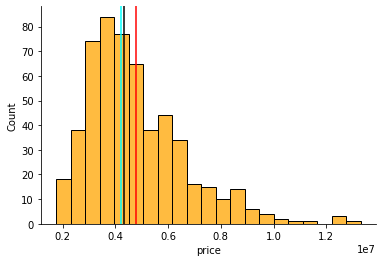

In [43]:
# visualizing Price distribution
sns.histplot(df_ml.price, color = 'orange')

# distribution characteristics
plt.axvline(df_ml.price.mean(), color = 'red')
plt.axvline(df_ml.price.median(), color = 'black')
plt.axvline(df_ml.price.mode()[1], color = 'cyan')
plt.gca().spines[['top', 'right']].set_visible(False);

Long tail distribution (Positive skew - tail to the right) with very few houses having high prices. Positive skew distribution is where the mode < median < mean, here mean lies at roughly 477k and mode is about 420k. This type of distribution is not good for machine learning as it confuses the model so we need to transform data to be more Gaussian (normally distributed).

In [44]:
# exotic houses having prices > 12M
df_ml[df_ml.price > 12000000]

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished


These houses are not the largest (max area in this dataset is 16k), some of the other features must be influencing price fluctuations. let's compare these houses with larger ones at lower price range. 

In [45]:
# large houses having less prices
df_ml[df_ml.area > 9960].head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
10,9800000,13200,3,1,2,yes,no,yes,no,yes,2,yes,furnished
56,7343000,11440,4,1,2,yes,no,yes,no,no,1,yes,semi-furnished
64,7000000,11175,3,1,1,yes,no,yes,no,yes,1,yes,furnished
66,6930000,13200,2,1,1,yes,no,yes,yes,no,1,no,furnished


Close resemblance between features in both queries, apart from *airconditioning*, *prefarea* and *furnishingstatus*; prefarea stands for preferred area which indicates whether the house has an attractive location or not.

Let's visualize price distribution of these features.

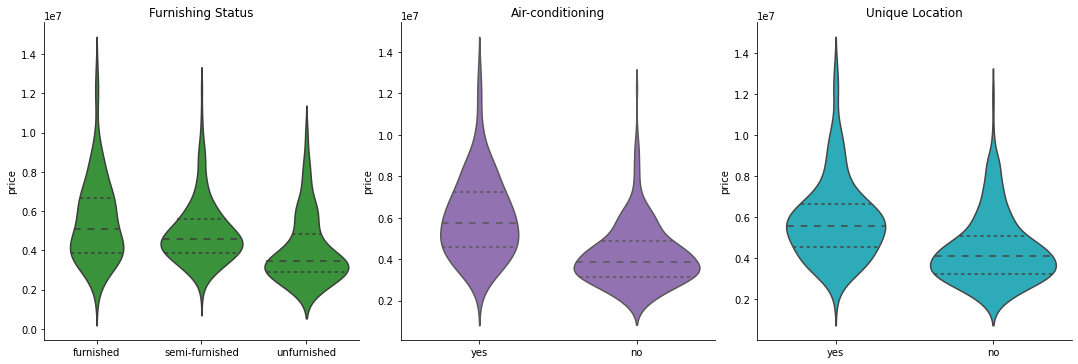

In [46]:
# visualizing categorical features
fig, axes = plt.subplots(ncols = 3, figsize = (15, 5))
fig.tight_layout()
ax1, ax2, ax3 = axes

# plot
sns.violinplot(x = df_ml.furnishingstatus, y = df_ml.price, color = sns.color_palette()[2], inner = 'quartile', ax = ax1)
sns.violinplot(x = df_ml.airconditioning, y = df_ml.price, color = sns.color_palette()[4], inner = 'quartile', ax = ax2)
sns.violinplot(x = df_ml.prefarea, y = df_ml.price, color = sns.color_palette()[9], inner = 'quartile', ax = ax3)

# decorate
ax1.set_xlabel(None); ax2.set_xlabel(None); ax3.set_xlabel(None); ax1.set_title('Furnishing Status'); 
ax2.set_title('Air-conditioning'); ax3.set_title('Unique Location')
ax1.spines[['top', 'right']].set_visible(False); ax2.spines[['top', 'right']].set_visible(False); 
ax3.spines[['top', 'right']].set_visible(False);

Indeed the average price of fully furnished air-conditioned and uniquely located house is higher than those that are not, which is intuitive as we'd expect that these features combined contribute to higher price valuation.

There are some unfurnished houses in not so popular locations that still have high prices as evidenced from third quartile; however, the peak of distribution is at the lower end of price range compared to the rest. This implies that we need more features to distinguish these houses from the rest.

In [47]:
# Preprocessing

# separate categorical and numeric features
cat_cols = df_ml.select_dtypes('object').columns
num_cols = df_ml.columns[~df_ml.columns.isin(cat_cols)]

# Convert categorical features to numeric (no/yes to 0/1)
for col in cat_cols[:-1]:
    df_ml[col] = df_ml[col].eq('yes').mul(1)
    
# OneHotEncoding multilevel categorical feature
df_ml = pd.get_dummies(df_ml, columns=['furnishingstatus'], prefix = '', drop_first= True)

# remove space and special characters from column names
df_ml.columns = df_ml.columns.str.strip('' '|_')

# transforming price and area feature
df_ml.price = np.log1p(df_ml.price)
df_ml.area = np.log1p(df_ml.area)

# partitioning dataset
train_set, test_set = train_test_split(df_ml, test_size = 0.2, random_state = 42)

# establishing training and validation sets
X = train_set.drop('price', axis = 1)
y = train_set.price

x_train, x_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 42)

Preprocessing steps are:
- Encoding Categorical features into numeric form
- split whole dataset into 3 partitions; training, validation and testing.
- Log transforming both *price* and *area* features into a Gaussian like distribution, this is to remove the skew we noted earlier. 
- Instantiate training, validation and testing sets.

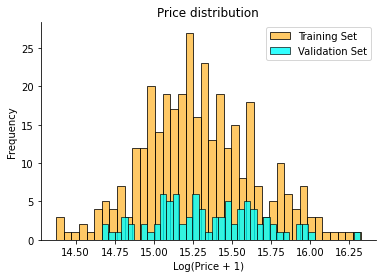

In [48]:
# Visualizing price distribution between training and validation sets

plt.figure(figsize=(6, 4))

sns.histplot(y_train, label='Training Set', color='orange', alpha=0.6, bins=40)
sns.histplot(y_val, label='Validation Set', color='cyan', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Price distribution')
plt.gca().spines[['top', 'right']].set_visible(False);

Price distribution between both sets is fairly similar, and Gaussian like after applying log transformation.

<a id='mols'></a>

In [49]:
# Multiple OLS regression from scratch

class ols():
    def __init__(self, reg = False, lamda = None, verbose = True):
        '''Ordinary Least Square and optional L2 regularization'''
        self.intercept = None
        self.weights = None
        self.reg = reg
        self.lamda = lamda
        self.verbose = verbose
    
    def fit(self, x, y):
        '''estimate coefficients'''
        # prepare x and y for weights estimation
        x = self.transform_x(x)
        y = self.transform_y(y)
        
        w = self.estimate_weights(x, y) # calculate weights
        
        self.intercept = w[0] # Intercept
        
        self.weights = w[1:] # feature weights
        
        if self.verbose: # display results
            
            try:
                len(self.cols) != 0
                
                linear_equation = f'Price = {self.intercept.round(3)} + '
                
                for i, col in enumerate(self.cols):
                    linear_equation += f' {self.weights[i].round(3)} * {col} +'

                print('features used in training the model: ', ', '.join(self.cols), '\n', '-' * 40, '\n',
                      'linear equation: ', ' '.join(linear_equation.split(' ')[:-1]), sep = '')
                
            except:
                print('linear equation: ', self.intercept.round(3), ' + ' , 
                      '{0}{1}'.format('x + '.join(str(self.weights.round(3)).strip('[|]').split()), 'x'), sep = '')
        
    def predict(self, x):
        '''generate predictions'''
        
        # dynamic input
        x = np.array(x)
        
        if x.ndim > 1: 
        
            pred = self.intercept + x.dot(self.weights) # multiple linear regression
        
        else: 
            x = x.reshape(-1,1) # simple linear regression (single feature)
            pred = self.intercept + x.dot(self.weights) 
            
        return np.array(pred)

    def transform_x(self, x):
        '''create copy and add intercept'''
        # dynamic input
        try:
            x.values
            self.cols = x.columns # capturing feature names if passed a dataframe
            x = copy.deepcopy(np.array(x))
        except:
            x = copy.deepcopy(np.array(x))

        # intercept
        ones = np.ones(x.shape[0])
        x = np.column_stack([ones, x])
        return x
    
    def transform_y(self, y):
        # dynamic input
        y = copy.deepcopy(np.array(y))
        return y
    
    def estimate_weights(self, x, y):
        '''Normal Equation'''
        # Ridge regression
        if self.reg:
            
            assert self.lamda != None, 'please input a value for lambda!'
            
            # Normal Equation
            XTX = x.T.dot(x)
            # reguralize
            XTX = XTX + self.lamda * np.eye(XTX.shape[0])
            # invert
            XTX_inv = np.linalg.inv(XTX)
            # estimate
            w = XTX_inv.dot(x.T).dot(y)
        # OLS
        else:
            # Normal Equation
            XTX = x.T.dot(x)
            # invert
            XTX_inv = np.linalg.inv(XTX)
            # estimate
            w = XTX_inv.dot(x.T).dot(y)

        return w
    
    def r2_score(self, y, pred):
        '''r^2'''
        y_average = np.average(y)

        residual_sum_of_squares = sum([(i - j)**2 for i, j in zip(y, pred)])
        total_sum_of_squares = sum([(i - y_average)**2 for i in y])
        
        r2 = 1 - (residual_sum_of_squares / total_sum_of_squares)

        return round(r2, 3)
    
    def act_vs_pred_plot(self, y, pred):
        '''Visualize'''
        # display r2
        r2_score = self.r2_score(y, pred)
    
        # Visualizing model performance
        plt.figure(figsize=(6, 4))

        sns.histplot(y, label='target', color='orange', alpha=0.9, bins=40)
        sns.histplot(pred, label='prediction', color='cyan', alpha=0.6, bins=40)

        plt.legend()

        plt.ylabel('Frequency')
        plt.xlabel('Log(Price + 1)')
        plt.title(f'Predictions vs actual distribution - Rsq {r2_score}')

        plt.gca().spines[['top', 'right']].set_visible(False);

**<a href="#toc" style='color:#00ffff'>Table of contents</a>**

features used in training the model: area, bedrooms, bathrooms, stories, parking
----------------------------------------
linear equation: Price = 11.408 +  0.392 * area + 0.033 * bedrooms + 0.193 * bathrooms + 0.109 * stories + 0.05 * parking


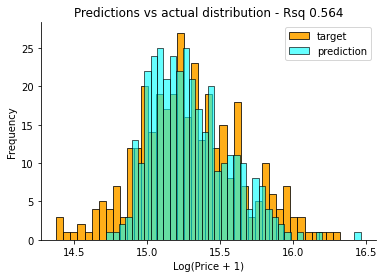

In [50]:
# train and evaluate

def train_eval(model, x_train, y_train, x_test, y_test, plot = True):
    '''fit, predict and visualize'''
    model.fit(x_train, y_train)

    pred = model.predict(x_test)

    if plot:
        model.act_vs_pred_plot(y_test, pred)

    return pred

        
# using original numeric features only
x_train_ = x_train[num_cols[1:]]

model = ols()

pred = train_eval(model, x_train_, y_train, x_train_, y_train)

In [51]:
# example of prediction errors
# using max house price in our training set

# inverse log transformation for proper comparison
act_val = np.expm1(y_train.values[np.argmax(y_train.values)]).round()
pred_val = np.expm1(pred[np.argmax(y_train.values)]).round()
er = act_val - pred_val

print('Actual price: ', f'{act_val:,}', '\n' ,'Predicted price: ', f'{pred_val:,}', '\n' , 'Diff.: ', f'{er.round():,}', 
     sep = '')

Actual price: 12,250,000.0
Predicted price: 14,093,154.0
Diff.: -1,843,154.0


Despite that the peaks of distributions does match, predictions are off in many cases and this is reflected in average r2 score. Using the highest valued house in our training data as an example, our model predicted a value of 14M for an actual price of 12.2M.

r-squared is the proportion of the variation in the dependent variable(target) that is predictable from the independent variable(s) (attributes). Approximately 56% of the variance in house price is explained by the used features.

R2 does not indicate whether:

- The independent variables are a cause of the changes in the dependent variable;
- The correct regression was used;
- The most appropriate set of independent variables has been chosen;
- There is collinearity present in the data on the explanatory variables;
- The model might be improved by using transformed versions of the existing set of independent variables;
- There are enough data points to make solid conclusion.

Visualizing model performance is not enough and we need a more robust quantitative metric to measure against, that’s when cost functions comes in handy.

**<a href="#toc" style='color:#00ffff'>Table of contents</a>**

<a id='lvc'></a>

### Loss vs Cost functions

The objective in Ordinary least squares regression is to minimize the difference between actual and predicted value, usually presented as the loss function over a *single* data point

$L$($y_i$ , $\hat{y}_i$) = ($y_i$ - $\hat{y}_i$)$^2$ 

which can also be denoted as

$J$($\theta$) = ($y_i$ - $h$$\theta$($x_i$))$^2$    

where:

- $y_i$ actual data point
- $\hat{y}_i$ prediction (model, i.e: $\beta_0$ + $\beta_1$$x_i$)
- $h$$\theta$($x_i$) prediction (model a.k.a hypothesis, i.e: $\theta_0$ + $\theta_1$$x_i$)
- $\theta$ are model parameters (a.k.a slope/intercept/beta/coefficients)

Thus, we can think of loss function as representation of prediction errors generated by our model in the form of a non-negative number for each data point. We are tasked to design a performance measures that correspond directly to the loss function we wish to minimize, these measures are calculated over *all* data points and are referred to as Cost Functions; examples of cost functions for OLS regression:

##### Mean Squared Error:

$MSE$ = $\frac {1}{n}$$\sum _{i=1}^{n}$($y_i$ - $\hat{y}_i$)$^2$ and in matrix notation $\frac {1}{n}$$\sum _{i=1}^{n}$$(e_{i})^{2}$ = $\frac {1}{n}$$\mathbf {e} ^{\mathsf {T}}$$\mathbf {e}$; so its basically the dot/inner product of error vector divided by its length (number of items within vector) as: 
- $\frac {1}{n}$$\sum _{i=1}^{n}$ is the mean, 
- $(e_{i})^{2}$ is ($y_i$ - $\hat{y}_i$)$^2$,
- $\mathbf {e}$ is error vector holding $(e_{i})^{2}$. 

##### Root Mean Squared Error: 

$RMSE$ = $\sqrt{\frac {1}{n}\sum _{i=1}^{n}(y_i - \hat{y}_i)^2}$

##### Mean Absolute Error: 

$MAE$ = $\frac {1}{n}$$\sum _{i=1}^{n}$|$y_i$ - $\hat{y}_i$|

Calculating cost function for our model and after each adjustment gives us a quantitative measurement whether we are improving our model or not, Lower values indicate better fit.

##### Notes:

- When it comes to addressing "loss" vs "cost" function, those terms are loose; sometimes referred to as "objective" function. However, we can make a distinction based on calculation; *loss* is typically the deviation of prediction from actual value for a single data point collectively known as *cost* if measured for all data points. In practice, the term *cost* is more common because we are interested in minimizing deviations across all data points. 

- The design of cost function should correspond directly to the loss function we seek to minimize but there is often a mismatch, this could be due to issues such as ease of implementation. Example of mismatch: in OLS the loss function is sum of squared residuals, but we can use MAE as performance measure.

- We can think of a linear model in terms of two functions working together as follows:

    - Hypothesis function ($h$$\theta$($x_i$), $\hat{y}_i$ aka model), depicting relationship between features (independent variables) and target values (dependent variable). Regression is a form of hypothesis testing capturing relationship between two variables.
    - Cost function ($L$($y_i$ , $\hat{y}_i$), $J$($\theta$)), is an optimization measurement for the hypothesis function. We seek parameters that *'work well'* in minimizing the cost function which in turn means that our hypothesis function fits the data better. Let's consider the below fig where each line (model aka fit) on the left corresponds to different cost value (i.e.: residual sum of squares) on the right; our objective is to search for parameters that fits a line having minimum cost (lowest point on curve).

<img class="aligncenter" src="https://drive.google.com/uc?id=1aKkzoOZSl7mup_zWV2FQx7b17HWUx6nj" width="600" height="600">

- Most of the data we work with are samples of a greater population, one assumption that is commonly made in machine learning is that these samples are [independent and identically distributed (i.i.d)](https://en.wikipedia.org/wiki/Independent_and_identically_distributed_random_variables), so we can use sample (empirical mean) of a given measurement as an estimate of the population mean for the same measurement. This means that model performance on training data is reasonably expected to generalize to new data that is drawn from the same population because the model parameter used in generating theses measurements will also generalize to the unseen data. In other words, when samples are i.i.d the sample mean is an unbiased estimator of the population mean; the unbiased estimator doesn't need to be equal to actual mean, but it is as close as we can get given this information. 

Let’s make a comparison and interpret the difference between each of these cost functions.

In [52]:
# Comparison between cost functions MSE, MAE and RMSE

def performance_measurement(y, pred, inverse_trans = False, verbose = True):
    
    if inverse_trans:

        # inverse log transformation for interpretability
        residuals = [i - j for i, j in zip(np.expm1(y), np.expm1(pred))]
        
    else:

        # calculate residuals
        residuals = [i - j for i, j in zip(y, pred)]

    # calculate the squared errors and absolute value of errors
    sq_res = np.square(residuals)
    abs_res = np.abs(residuals)

    # mean squared error
    mse = np.mean(sq_res)

    # # mse using matrix notation
    # mse = np.array(residuals).dot(np.array(residuals)) / len(np.array(residuals))

    # mean absolute error
    mae = np.mean(abs_res)

    # root mean squared error
    rmse = np.sqrt(mse)
    
    if inverse_trans:
        
        # inverse log transformation for interpretability
        sq_dev = [(i - np.expm1(y.values.mean()))**2 for i in np.expm1(y.values)]
        
    else:

        # squared deviation of actual values from the mean
        sq_dev = [(i - y.values.mean())**2 for i in y.values]

    # variance - actual price
    tv = np.mean(sq_dev)

    # std - actual price
    tstd = np.sqrt(tv)
    
    if verbose:

        print('MSE: ', mse.round(3), '\n', 'MAE: ', mae.round(3), '\n', 'RMSE: ', 
              rmse.round(3), '\n', 'Variance - Actual Price: ', tv.round(3) , '\n', 'Std - Actual Price: ', tstd.round(3), '\n',
              '% of variation between MSE and Variance - actual price : ', np.round((mse / tv) - 1, 3), sep = '')

    return residuals

In [53]:
# Assess performance
rsd = performance_measurement(y_train, pred)

MSE: 0.055
MAE: 0.18
RMSE: 0.235
Variance - Actual Price: 0.126
Std - Actual Price: 0.355
% of variation between MSE and Variance - actual price : -0.564


We saw earlier that errors in predictions could be negative and we need to incorporate all errors when assessing model performance rather than them cancelling each other (positive cancel/reduce -ve); this is what each of the cost function above do.

MSE comes out markedly different in magnitude than MAE and RMSE. That’s because MSE is in squared units. For that reason, the RMSE is usually a more usable number to calculate. In the calculation above this may not be readily noticeable because of log transformation, but if we used the original price values we will immediately notice this.

Variance and the standard deviation of the targets are useful to compare to the MSE and RMSE respectively. For example, if the MSE of prediction errors is roughly the same as the target variance (or the RMSE is roughly the same as target standard deviation), the prediction algorithm is not performing well; We can easly replace the prediction algorithm in such case with a simple calculation of the mean of the target values that perform as well. let's pause and think about it:

- MSE = avg((actual price - prediction)**2)
- Price variance = avg((actual price - avg actual price)**2)

The difference between the two calculations is the value our model brings in reducing prediction errors, if the error using the model (MSE) is higher than using a simple average of actual values (Price variance) then there is no point in using this model and yes, a simple average is a prediction! so we are basically making predictions daily without even noticing when we guess the average of something.

In the example above we notice a decrease in MSE and RMSE from the actual price variance and standard deviation; this is fairly a good performance. The percentage of change between MSE and price variance is indeed the $R^2$ score we calculated earlier! Flipping the sign to indicate the direction of change (increase/decrease); we can think of it as follows: 

- MSE represents 44% of actual price variance (100%), the difference (56%) is gone because our model was able to generate predictions that are better than using the simple average of actual values, in other words we can say that *Knowing the features of a house our model **explains** 56% of variance in house price.*

##### Notes:

- RMSE has the useful property of being in the same units as actual price, for example if all prices were in USD the RMSE value is also in USD so it provides an easy explainable measurement. This might not be obvious in the calculation above because of log transformation, when inversed will make sense.

**<a href="#toc" style='color:#00ffff'>Table of contents</a>**

<a id='sfe'></a>

### Simple feature engineering

We've been using the original numerical features only so far, we can now incorporate more features into our model and assess whether performance improve or degrade. [Feature engineering](https://en.wikipedia.org/wiki/Feature_engineering) is when we create/extract new features not readily available from our data.

We've already done some simple feature engineering when preprocessing the data, this included transformation and encodings.

### Categorical features

There are several ways to handle categorical (aka cat, Meaooo!) features; all have the same basic principle which is seeking a unique numeric representation for each category. Below are some of the popular ways for handling such features:

- One-hot Encoding (OHE): will produce a sparse matrix (having many zeros, i.e. 1 for true and 0 elsewhere) for each unique category. We did OHE to extract furnishing status for each house.
- Label Encoding: substituting each level with a unique value (number). For example instead of OHE we can label encode furnishing status feature, no additional columns are going to be generated for each status rather each will be given a unique number (i.e. furnished = 1, semi-furnished = 2, etc.).
- Target Encoding: very powerful yet very dangerous encoding technique as it can lead to serious data leakage and misleading optimistic performance. Each category (level) is substituted by the frequency of occurrence in that level; the frequency can take any form such as mean, count, etc.

Now let’s incorporate new features into our model and measure performance.

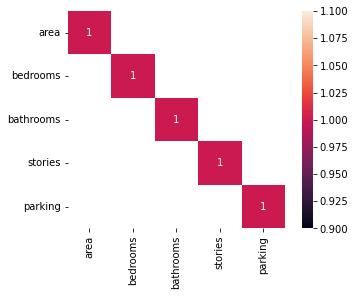

In [54]:
# Visualizing correlation among features
corr = x_train_.corr()

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], annot=True, annot_kws={"size": 10}, square=True);

No severe multicollinearity, features are not highly correlated with each other.

In [55]:
# feature names
x_train.columns

Index(['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
       'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea',
       'semi-furnished', 'unfurnished'],
      dtype='object')

In [56]:
# Adding furnishing status
x_train[np.r_[num_cols[1:],x_train.columns[-3:-1]]].head(2)

,area,bedrooms,bathrooms,stories,parking,prefarea,semi-furnished
159,8.055475,3,2,1,0,0,0
475,8.006701,2,1,2,0,0,1


features used in training the model: area, bedrooms, bathrooms, stories, parking, prefarea, semi-furnished
----------------------------------------
linear equation: Price = 11.661 +  0.355 * area + 0.027 * bedrooms + 0.205 * bathrooms + 0.107 * stories + 0.048 * parking + 0.203 * prefarea + 0.047 * semi-furnished


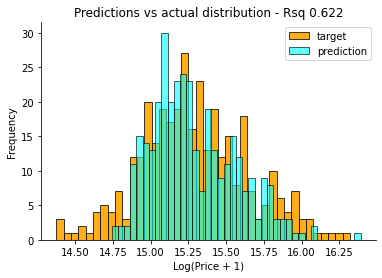

In [57]:
# train and evaluate

# using mix of categorical and numeric features
x_train_ = x_train[np.r_[num_cols[1:], x_train.columns[-3:-1]]]

pred = train_eval(model, x_train_, y_train, x_train_, y_train)

In [58]:
# Assess performance
rsd = performance_measurement(y_train, pred)

MSE: 0.048
MAE: 0.166
RMSE: 0.218
Variance - Actual Price: 0.126
Std - Actual Price: 0.355
% of variation between MSE and Variance - actual price : -0.622


Adding furnishing status to our model did in fact improve predictions, but we are assessing performance on training data an approach that does not provide insights on model generalizability.

**<a href="#toc" style='color:#00ffff'>Table of contents</a>**

<a id='gen'></a>

### Generalizability: evaluating performance out of sample

We aim to build a model having parameters that provide consistent performance on unseen data, that’s why we need to test our model on unseen data and ensure that the performance measurements we've seen on training data is similar to those generated using new data.

A model is said to *overfit* when delivering inconsistent performance between training and testing data (i.e. low RMSE on training data vs high RMSE on testing data), this means that model parameters (theta/beta/coefficients) fails to generalize on unseen data. *Underfitting* is the opposite where our model fails to capture the relationship between the features and target vales, generating a high error rate on both training and unseen data.

There are several methods to test and control model performance, among which are:

- Testing model on unseen data
- Regularization

We've designed our validation framework to include three separate data sets, one for training the model and the other two for validation and testing. From now on we will be testing model performance on validation set.

Notes:
- The design of training set should be carefully constructed; we do want our model to be trained with data that is representative of underlying problem.

- [K-fold cross validation](https://scikit-learn.org/stable/modules/cross_validation.html) provides a more robust approach for assessing model generalizability.

- Mind data leakage! In a nutshell, when test data becomes known during training we say that *leakage* occurred; in its simplest form leakage can happen when scaling whole dataset before partitioning into train, validation and test sets, when that happens scaled values in the training set will include information (mean and std) about the values from the other two sets and the model performance become overly optimistic. The proper way to scale data is to:

    - Partition data
    - Fit scaler on training set
    - Transform

features used in training the model: area, bedrooms, bathrooms, stories, parking, prefarea, semi-furnished
----------------------------------------
linear equation: Price = 11.661 +  0.355 * area + 0.027 * bedrooms + 0.205 * bathrooms + 0.107 * stories + 0.048 * parking + 0.203 * prefarea + 0.047 * semi-furnished


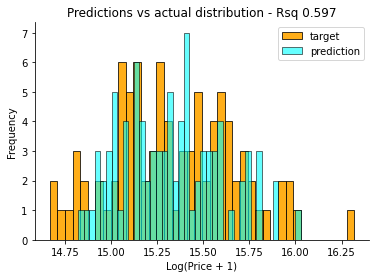

In [59]:
# train and evaluate - validation data

# using mix of categorical and numeric features
x_train_ = x_train[np.r_[num_cols[1:], x_train.columns[-3:-1]]]
x_val_ = x_val[np.r_[num_cols[1:], x_val.columns[-3:-1]]]

pred = train_eval(model, x_train_, y_train, x_val_, y_val)

In [60]:
# Assess performance
rsd = performance_measurement(y_val, pred)

MSE: 0.047
MAE: 0.17
RMSE: 0.216
Variance - Actual Price: 0.116
Std - Actual Price: 0.34
% of variation between MSE and Variance - actual price : -0.597


Consistent performance when applying our model to unseen data, not exactly the same but did not diverge by much. Let’s add all features!

features used in training the model: area, bedrooms, bathrooms, stories, mainroad, guestroom, basement, hotwaterheating, airconditioning, parking, prefarea, semi-furnished, unfurnished
----------------------------------------
linear equation: Price = 12.109 +  0.3 * area + 0.023 * bedrooms + 0.171 * bathrooms + 0.095 * stories + 0.104 * mainroad + 0.017 * guestroom + 0.119 * basement + 0.145 * hotwaterheating + 0.135 * airconditioning + 0.032 * parking + 0.14 * prefarea + -0.014 * semi-furnished + -0.112 * unfurnished


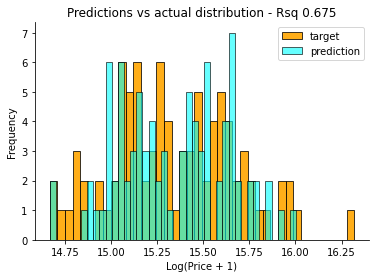

In [61]:
# train and evaluate - validation data

# using all features
x_train_ = x_train
x_val_ = x_val

pred = train_eval(model, x_train_, y_train, x_val_, y_val)

In [62]:
# Assess performance
rsd = performance_measurement(y_val, pred)

MSE: 0.038
MAE: 0.154
RMSE: 0.194
Variance - Actual Price: 0.116
Std - Actual Price: 0.34
% of variation between MSE and Variance - actual price : -0.675


In [63]:
# linear regression using sklearn

m = LinearRegression()

m.fit(x_train_, y_train)

pred = m.predict(x_val_)

print('intercept: ', m.intercept_.round(3), '\n', '-' * 30, '\n',
      'coef: ', m.coef_.round(3), '\n', '-' * 30, '\n',
      'r2_score: ', r2_score(y_val, pred).round(3), sep = '')

intercept: 12.109
------------------------------
coef: [ 0.3    0.023  0.171  0.095  0.104  0.017  0.119  0.145  0.135  0.032
  0.14  -0.014 -0.112]
------------------------------
r2_score: 0.675


Sklearn implementation provided same results as our model.

features used in training the model: area, bedrooms, bathrooms, stories, mainroad, guestroom, basement, hotwaterheating, airconditioning, parking, prefarea, semi-furnished, unfurnished
----------------------------------------
linear equation: Price = 12.165 +  0.296 * area + 0.02 * bedrooms + 0.185 * bathrooms + 0.083 * stories + 0.089 * mainroad + 0.036 * guestroom + 0.104 * basement + 0.132 * hotwaterheating + 0.146 * airconditioning + 0.033 * parking + 0.133 * prefarea + -0.005 * semi-furnished + -0.115 * unfurnished


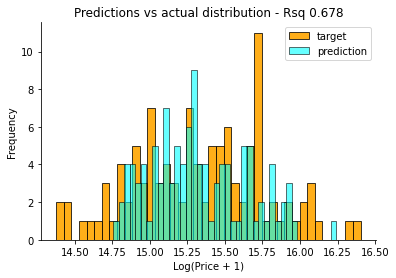

In [64]:
# train and evaluate - test data

x_tr, x_ts, y_tr, y_ts = train_set.drop('price', axis = 1), test_set.drop('price', axis = 1), train_set.price, test_set.price

# using all features
x_tr_ = x_tr
x_ts_ = x_ts

pred = train_eval(model, x_tr_, y_tr, x_ts_, y_ts)

In [65]:
# Assess performance
rsd = performance_measurement(y_ts, pred, inverse_trans = True)

MSE: 1725758317178.936
MAE: 969727.788
RMSE: 1313681.208
Variance - Actual Price: 5263855909730.086
Std - Actual Price: 2294309.463
% of variation between MSE and Variance - actual price : -0.672


We've used training and validations set to train the model, displaying consistent performance on test set. However, predictions are off by an average of 1.3M (RMSE) this means that on average we'd expect our predicted house price to be +/- 1.3M which is considered to be an *average* performance given that prices are in millions.

Our model completely miss predictions at the edge of the data (14.7 > price > 16), moreover, we are using a fixed train and test set which does not provide a robust assessment for model performance; simply because the testing data may be populated with *easy* examples that our model can predict accurately but won't be the case with a different subset of data.

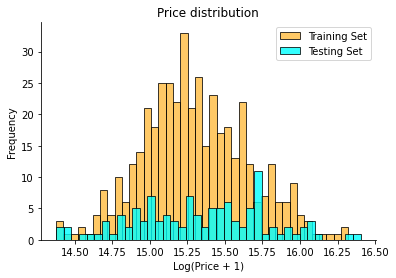

In [66]:
# Visualizing price distribution between training and testing sets

plt.figure(figsize=(6, 4))

sns.histplot(y_tr, label='Training Set', color='orange', alpha=0.6, bins=40)
sns.histplot(y_ts, label='Testing Set', color='cyan', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Price distribution')
plt.gca().spines[['top', 'right']].set_visible(False);

Testing dataset does include more examples of houses at the edge of price range. This mismatch can be addressed by training the model on different subsets of data then taking the average of our performance metric over all subsets, this is the principle idea of k-fold cross validation.

In [67]:
# Calculating r^2 over different splits

def avg_score(df, test_size, target_col , model, plot = False, verbose = True, drop_feat = None):
    
    _ = range(1, 51)

    r2_scr = []

    for n in _:

        # partitioning dataset
        x_tr, x_ts, y_tr, y_ts = train_test_split(df.drop(target_col, axis = 1), df[target_col], test_size = test_size, 
                                                  random_state = n)
        
        if drop_feat:
            
            # eliminating features
            x_tr_ = x_tr.drop(drop_feat, axis = 1)
            x_ts_ = x_ts.drop(drop_feat, axis = 1)
            
        else:
            
            # using all features
            x_tr_ = x_tr
            x_ts_ = x_ts
                    
        pred = train_eval(model, x_tr_, y_tr, x_ts_, y_ts, plot = plot) # train and evaluate

        r2_scr.append((n, r2_score(y_ts, pred)))
        
    if verbose:

        print('Best split: ', _[np.argmax(np.array(r2_scr)[:,1])], '\n' , 'Highest r2_score: ', 
              np.array(r2_scr)[:,1].max().round(2), '\n', 'Average r2_score: ', np.array(r2_scr)[:,1].mean().round(2), sep = '')
    
    return r2_scr

In [68]:
# different splits

score = avg_score(df_ml, .2, 'price' , ols(verbose = False))

Best split: 48
Highest r2_score: 0.77
Average r2_score: 0.68


Notice how r2 score change given different subset of data, this means that our model is sensitive to input data. We'd have been left with an optimistic measure of r2 score if we relied on fixed training/testing sets that matched the best split criterion; average r2 score convey a more realistic performance measure.

##### Notes:
- The random_state parameter in train_test_split controls the randomness of initial split points, different values result in different subsets of data.

In [69]:
# Cross validation is Sklearn

# shuffling dataframe before cross validation
np.random.seed(2)
n = len(df_ml)
idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df_ml.iloc[idx]

scores = cross_val_score(LinearRegression(), df_shuffled.drop(['price'], axis=1), df_shuffled.price, cv=10, scoring='r2')

print('Average r2_score:', scores.mean().round(3))

Average r2_score: 0.68


After observing the importance of structuring a well representative training set and its direct effect on model assessment we can now look into how to improve prediction results, specially that we know the average performance of our model. 

##### Notes:
- It’s important to shuffle data before applying cross validation using sklearn as it does not auto shuffle the data as in train_test_split, this is to ensure that each fold contains a representative sample special if there is data is sorted in a structured manner. Our data is sorted in descending order, not shuffling will result in an unbalanced distribution of house pricing between training and validation folds leading to misleading scores.

In [70]:
# check for duplicated records
mask = df_ml[df_ml.columns[1:]]

df[df.index.isin(mask[mask.duplicated(keep = False)].index)].sort_values('area', ascending = False)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
414,3423000,4040,2,1,1,yes,no,no,no,no,0,no,unfurnished
435,3290000,4040,2,1,1,yes,no,no,no,no,0,no,unfurnished
408,3430000,4000,2,1,1,yes,no,no,no,no,0,no,unfurnished
496,2695000,4000,2,1,1,yes,no,no,no,no,0,no,unfurnished
458,3115000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished
385,3570000,3640,2,1,1,yes,no,no,no,no,0,no,unfurnished
525,2345000,3640,2,1,1,yes,no,no,no,no,0,no,unfurnished
407,3465000,2145,3,1,3,yes,no,no,no,no,0,yes,furnished
411,3430000,2145,3,1,3,yes,no,no,no,no,0,yes,furnished


Houses having identical features but different price range can confuse our model; check index 458 and 544 there is a considerable difference between the prices of both houses despite the fact that they have identical features. This suggests that these records might be erroneous or there are other features that affected price fluctuation which we can't infer from the given data.

We'll remove all these samples considering they are erroneous.

In [71]:
# remove duplicated records

dup = mask[mask.duplicated(keep=False)]

df_ml_dd = df_ml[~df_ml.index.isin(dup.index)]

In [72]:
# different splits after deduplication

score = avg_score(df_ml_dd, .2, 'price' , ols(verbose = False))

Best split: 18
Highest r2_score: 0.78
Average r2_score: 0.69


Minor improvement in average r2 score after deduplication.

In [73]:
# Regularization

score = avg_score(df_ml_dd, .2, 'price' , ols(reg = True, lamda = 0.01, verbose = False))

Best split: 18
Highest r2_score: 0.78
Average r2_score: 0.69


Ridge regularization didn't fail; it just didn't really change anything. We cannot just throw regularization at a problem and assume it must improve the model.

Feature weights (coefficients) are already small; this means that the model is not placing heavy reliance on a specific feature that needs to be trimmed down. In fact the model did improve after we've included all features, which signals that there is a lack of features to capture underlying structure and we've seen this in the duplicated records we removed earlier when none of the features did explain price variations.

In [74]:
# scores of latest single split

rsd = performance_measurement(y_ts, pred)

MSE: 0.062
MAE: 0.2
RMSE: 0.249
Variance - Actual Price: 0.193
Std - Actual Price: 0.439
% of variation between MSE and Variance - actual price : -0.678


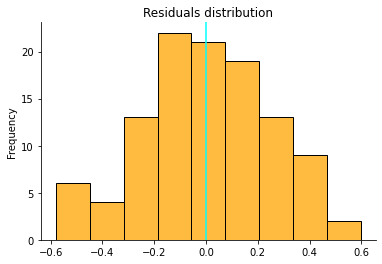

In [75]:
# visualizing residuals

plt.axvline(0, color = 'cyan')
sns.histplot(rsd, color = 'orange')

plt.ylabel('Frequency')
plt.title('Residuals distribution')
plt.gca().spines[['top', 'right']].set_visible(False);

After fitting a model, it is important to investigate the residuals to determine whether or not they appear to fit the assumption of a normal distribution. We want the bulk of distribution to be as close to zero as possible

Sometimes the error histogram will have two or more peaks, especially on the edge (far right or far left) of the graph where residuals are large indicating poor performance.

Our histogram depicts an average performance where residuals appear to be normally distributed but does not peak at zero; we'd need to look at the samples generating these errors and figure out the cause of deviation.

In [76]:
# MSE - Residuals
sum(np.square(rsd)) / x_ts_.shape[0]

0.062129418215978734

In [77]:
# MSE - Errors
sum(np.square(rsd)) / (x_ts_.shape[0] - x_ts_.shape[1] - 1)

0.07128533247938612

**<a href="#toc" style='color:#00ffff'>Table of contents</a>**

<a id='evr'></a>

### Errors vs Residuals

We need to differentiate between two terminologies that are frequently used interchangeably being *Errors* and *Residuals* 

- Errors: deviation from true value
- Residuals: deviation from estimated values

Consider our house price problem that we've been discussing so far, all the houses in the dataset are samples that are randomly chosen from a greater population of other houses which we don't know about. 

If we are to compute any given statistic , for example variance $\frac {1}{n}$$\sum _{i=1}^{n}$($x_{i}$ - $\bar{x}$)$^2$, we technically can't calculate price deviation between the houses in the dataset $x_{i}$ and their *true* expected values (i.e. population mean) as it is unobservable. Alternatively, we turn out to an *estimate* of expected values (i.e. sample mean) to derive such calculation; deviations are known as *errors* if true values are used in the associated calculations otherwise they are *residuals* when relying on estimates.   

#### Bias

In that sense, statistics of sampled data is generally biased this implies that the data selection may have been skewed by the collection criteria, unless we are sure that the sample is representative of the underlying population. In our dataset we noted that house prices are positively skewed perhaps more samples were collected for cheaper houses or was influenced by other factors we don't know about.

Existence of bias causes differences between results and facts which need to be addressed; one way to do so is to account for bias when calculating a given statistic. For example, when we calculate the *variance* instead of dividing by *n* (number of samples) we divide by *n-1* ($\frac {1}{n-1}$$\sum _{i=1}^{n}$($x_{i}$ - $\bar{x}$)$^2$) shrinking the denominator and increasing the output which implies that population variance is slightly higher than the sample one.

#### Example

To wrap this up let's look at how Mean Squared Error (MSE) is calculated, technically it should be called Mean Squared Residuals since it is derived using sample data (mean and n); if we are to call it MSE we'd have to address the existing bias as discussed previously. However, we usually assume that the sample data is independent and identically distributed (i.i.d), which means that sample mean is an unbiased estimator of the population mean; the unbiased estimator doesn't need to be equal to actual mean, but it is as close as we can get given this information. Hence, we rely on calculated statistics (MSE, RMSE, Mean, Variance, etc..) without having to account for bias.

In the example calculation of MSE above we accounted for bias by using n-p-1 in the denominator, known as [degrees of freedom](https://en.wikipedia.org/wiki/Degrees_of_freedom_(statistics)), where *n* is sample size and *p* is number of model parameters (coefficients) excluding intercept.

#### Summary

- Difference between observed and true value is an Error
- Difference between observed and estimated value is a Residual
- Account for bias, if any, when generalizing sample statistics to the population

**<a href="#toc" style='color:#00ffff'>Table of contents</a>**

<a id='slr'></a>

### Simple linear regression:

We can further enhance our understanding of coefficient by studying a simple linear regression model for a single feature (variable) represented as:

$\hat{y_i}$ = $\beta_{0}$ + $\beta_{1}$$x_{i}$ + $\varepsilon_{i}$ = $m$$x$ + $b$

where $\beta_{1}$ ($m$) is the slope(coefficient) and $\beta_{0}$ ($b$) is the intercept (value of $y$ when $x$ is 0).

The goal is to find estimated values for the parameters $\beta_{0}$ and $\beta_{1}$ which would provide the model with 'best' fit. We'll assume that an OLS approach is the best fit where we seek to estimate parameters that minimize the sum of squared residuals $\sum _{i=1}^{n}$($\varepsilon_{i}$$^2$) =  $\sum _{i=1}^{n}$($y_i$ - $\beta_{0}$ - $\beta_{1}$$x_{i}$)$^2$, 

The intercept $\beta_{0}$ is derived by:

$\beta_{0}$ = $\bar{y}$ - ($\beta_{1}$$\bar{x}$) 

where $\bar{x}$ (*x bar*) is average of $x$ and $\bar{y}$ (*y bar*) is average of $y$. We can solve for $\beta_{1}$ as follows:

$\beta_{1}$ = $\frac{\sum _{i=1}^{n}(x_{i} - \bar{x})(y_{i} - \bar{y})}{\sum _{i=1}^{n}(x_{i} - \bar{x})^2}$

For full derivation of $\beta_{1}$ check [here](https://statproofbook.github.io/P/slr-ols), now let's decompose the formula to further understand it:

- $\sum _{i=1}^{n}$($x_{i}$ - $\bar{x}$)($y_{i} - \bar{y}$) is the sample covariance between $x$ and $y$
- $\sum _{i=1}^{n}$($x_{i}$ - $\bar{x}$)$^2$ is sample variance

We already discussed variance in multiple regression, it's time now to gain general understanding of covariance which can be summarized as follows:

- Covariance (COV) indicate the degree of association between two random variables $x$ and $y$,
- If both variables grow in the same direction the covariance is positive and vice versa.
- The sign (+ /-) gives the direction of variation and the magnitude (value) gives the amount of variation.
- The value of COV does not indicate the strength of the relationship between the two variables.

We can't mention COV and forget it's close friend the Correlation $r$, as both describe the degree to which two random variables or sets of random variables tend to deviate from their expected values in similar ways. The most common form of correlation is [Pearson correlation coefficient](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient) calculated as follows:

$r_{xy}$ = $\frac{\sum _{i=1}^{n}(x_{i} - \bar{x})(y_{i} - \bar{y})}{\sqrt{\sum _{i=1}^{n}(x_{i} - \bar{x})^2}\sqrt{\sum _{i=1}^{n}(y_{i} - \bar{y})^2}}$

It's simply the COV divided by the dot product of standard deviations ($σ^2$) for each variable $\sqrt{\sum _{i=1}^{n}(x_{i} - \bar{x})^2}$$\sqrt{\sum _{i=1}^{n}(y_{i} - \bar{y})^2}$ 

Correlation can be summarized as follows:
- It is a scaled measure of covariance, dimensionless (just a number aka scalar) and independent of scale (not affected by unit of measurement for each variable, more on that below). 
- It measures the strength of variation for both the variables. 
- The value of correlation varies from +1 to -1. +1 is said to be a strong positive correlation and -1 is said to be a strong negative correlation. 
- Zero implies no correlation, or the two variables are independent of each other.

Nothing beats a worked example to swallow the concepts.

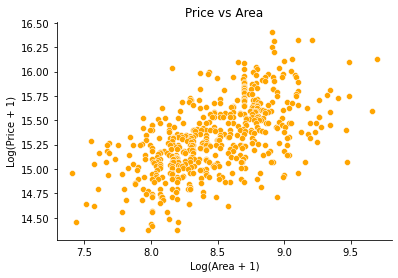

In [78]:
# visualizing relationship between house price and area

df_ml_dd_sr = df_ml_dd.copy()

df_ml_dd_sr = df_ml_dd_sr.reset_index(drop = True)

sns.scatterplot(x = df_ml_dd_sr.area, y = df_ml_dd_sr.price, color = 'orange')
plt.ylabel('Log(Price + 1)')
plt.xlabel('Log(Area + 1)')
plt.title('Price vs Area')
plt.gca().spines[['top', 'right']].set_visible(False);

We can immediately notice a positive relationship between both random variables, let's quantify.

<a id='cvc'></a>

In [79]:
# Calculating COV

def cov(x,y):   
    '''Covariance'''
    x = np.array(x)
    y = np.array(y)
    
    assert len(x) == len(y), 'Invalid calculation, number of samples mismatch'
    
    n = len(x)
    
    # mean
    x_mean = x.mean()
    y_mean = y.mean()
    
    # covariance
    cov = (x - x_mean).dot((y - y_mean)) / n
    
    return cov.round(3)

def corr(x,y):
    '''Pearson Correlation'''
    x = np.array(x)
    y = np.array(y)
    
    assert len(x) == len(y), 'Invalid calculation, number of samples mismatch'
    
    n = len(x)
    
    # mean
    x_mean = x.mean()
    y_mean = y.mean()
    
    # covariance
    cov = (x - x_mean).dot((y - y_mean)) / n 
    
    # Pearson corr
    corr = cov / (np.std(x) * np.std(y))
    
    return corr.round(3)

In [80]:
# Compare between COV and r

cov_ = cov(np.expm1(df_ml_dd_sr.price), np.expm1(df_ml_dd_sr.area))
corr_ = corr(df_ml_dd_sr.price, df_ml_dd_sr.area)

print('COV: ', cov_, '\n', 'r: ', corr_, sep = '')

COV: 2152836326.214
r: 0.578


COV indicate a positive relationship between the two variables, however, it is not readily helpful because the magnitude (value) is meaningless, yes it's a big value, but still does not indicate a strength of relation unlike the Pearson correlation coefficient $r$ that provide a meaningful quantification of the relationship.

In [81]:
# COV and r in numpy

print('COV: ', np.cov(np.expm1(df_ml_dd_sr.price), np.expm1(df_ml_dd_sr.area), bias = True)[0][1].round(3), '\n', 'r: ',
np.corrcoef(np.expm1(df_ml_dd_sr.price), np.expm1(df_ml_dd_sr.area))[0][1].round(3), sep='')

COV: 2152836326.214
r: 0.53


We mentioned earlier that correlation is independent of scale, why do we have different $r$ values after reversing log transformation?

By scale we mean the unit of measurement (i.e. money vs square feet) correlation is not affected by scales; log transformation tends to 'linearize' the variable thus affect correlation calculation.

Let’s visualize transformed and original values to make sense of it.

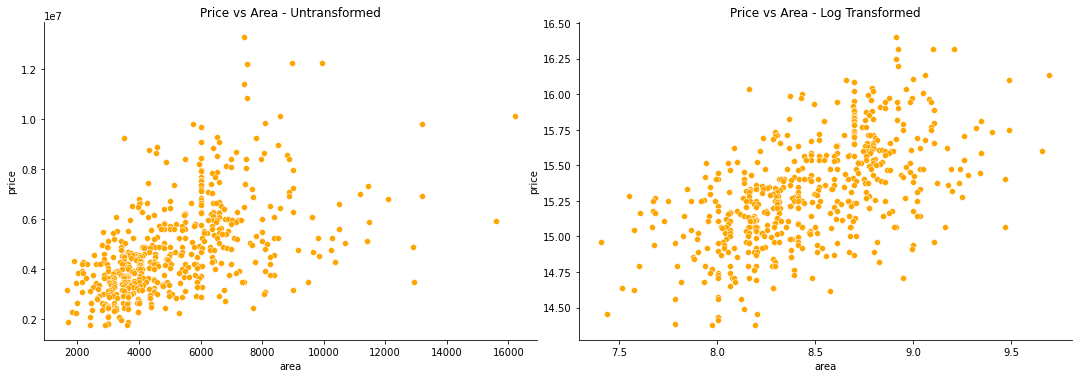

In [82]:
# visualizing relationship between house price and area - with/out log transformation

fig, axes = plt.subplots(ncols = 2, figsize = (15, 5))
fig.tight_layout()
ax1, ax2, = axes

# plot
sns.scatterplot(x = np.expm1(df_ml_dd_sr.area), y = np.expm1(df_ml_dd_sr.price), color = 'orange', ax= ax1)
sns.scatterplot(x = df_ml_dd_sr.area, y = df_ml_dd_sr.price, color = 'orange', ax= ax2)

# decorate
ax1.set_title('Price vs Area - Untransformed'); ax2.set_title('Price vs Area - Log Transformed'); 
ax1.spines[['top', 'right']].set_visible(False); ax2.spines[['top', 'right']].set_visible(False); 

We can immediately notice that transformed variables are more linear, this is reflected in the calculation of correlation coefficient that is higher for transformed values compared to original ones (58 vs 53).

We've used [Pearson correlation coefficient](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient), which assesses monotonic relationships (whether linear or not) between variables; thus more sensitive to transformations. Fortunately, there exist different methods that are less sensitive to transformation such as [Spearman's rank correlation](https://en.wikipedia.org/wiki/Spearman's_rank_correlation_coefficient) which relies on *ranks* (sum of squared difference between sequential order of the values from lowest to highest).

In [83]:
# Spearman's rank correlation

print('Untransformed: ', spearmanr(np.expm1(df_ml_dd_sr.price), np.expm1(df_ml_dd_sr.area))[0].round(3), '\n',
      'Transformed: ', spearmanr(df_ml_dd_sr.price, df_ml_dd_sr.area)[0].round(3), sep ='')

Untransformed: 0.598
Transformed: 0.598


In [84]:
# Correlation is independent of scale

# large scale
x = [1, 2, 3, 4, 5, 6, 7]
y = [1000, 200, 3000, 4000, 5000, 6000, 7000]

# smaller scale
x_ = [.01, .02, .03, .04, .05, .06, .07]
y_ = [10, 2, 30, 40, 50, 60, 70]

print('r - large scale: ', corr(x, y).round(3), '\n', 
      'r - small scale: ', corr(x_, y_).round(3), sep = '')

r - large scale: 0.969
r - small scale: 0.969


regardless of measurement unit (scale), $r$ didn't change.

**<a href="#toc" style='color:#00ffff'>Table of contents</a>**

<a id='sols'></a>

In [85]:
 # Simple OLS regression from scratch

class slr():
    
    def __init__(self, verbose = True):
        '''Simple Linear Regression'''
        self.b_0 = None
        self.b_1 = None
        self.verbose = verbose
    
    def fit(self, x, y):
        '''estimate coefficients'''

        w = self.estimate_weights(x, y)
        
        self.b_0 = w[0]
        
        self.b_1 = w[1]
        
        if self.verbose:
            
            print('linear equation: ', self.b_0.round(3), ' + ' , 
                  '{0}{1}'.format(self.b_1.round(3), 'x'), sep = '')
        
    def predict(self, x):
        '''generate predictions'''
        pred = self.b_0 + x * self.b_1
        
        return np.array(pred)
    
    def estimate_weights(self, x, y):
        '''Variance and Covariance'''
        x = np.array(x)
        y = np.array(y)
        
        assert len(x) == len(y), 'Invalid calculation, number of samples mismatch'

        n = len(x)

        # mean
        x_mean = x.mean()
        y_mean = y.mean()

        # covariance
        cov = (x - x_mean).dot((y - y_mean)) / n

        # variance -> avg squared deviation from the mean
        var = np.mean([(x - x_mean)**2 for i in y])

        b_1 = cov / var

        b_0 = y_mean - (b_1 * x_mean)

        return b_0, b_1
    
    def r2_score(self, y, pred):
        '''r^2'''
        
        y_average = np.average(y)

        residual_sum_of_squares = sum([(i - j)**2 for i, j in zip(y, pred)])
        total_sum_of_squares = sum([(i - y_average)**2 for i in y])
        
        r2 = 1 - (residual_sum_of_squares / total_sum_of_squares)

        return round(r2, 3)
    
    def act_vs_pred_plot(self, y, pred):
        '''visualize'''
        
        # display r2
        r2_score = self.r2_score(y, pred)
    
        # Visualizing model performance
        plt.figure(figsize=(6, 4))

        sns.histplot(y, label='target', color='orange', alpha=0.9, bins=40)
        sns.histplot(pred, label='prediction', color='cyan', alpha=0.6, bins=40)

        plt.legend()

        plt.ylabel('Frequency')
        plt.xlabel('Log(Price + 1)')
        plt.title(f'Predictions vs actual distribution - Rsq {r2_score}')

        plt.gca().spines[['top', 'right']].set_visible(False);

linear equation: 10.951 + 0.514x


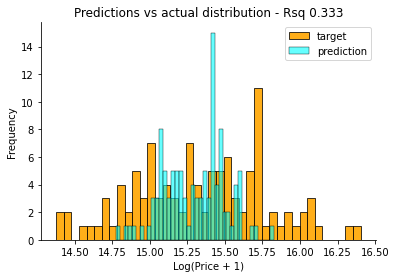

In [86]:
# fit and predict - simple linear regression

model = slr()

pred = train_eval(model, x_tr_.area, y_tr, x_ts_.area, y_ts)

In [87]:
# linear regression - sklearn

model_sk = LinearRegression()

model_sk.fit(np.array(x_tr_.area).reshape(-1,1), y_tr)

r_scr = r2_score(y_ts, model_sk.predict(np.array(x_ts_.area).reshape(-1,1))).round(3)

print('r2: ' , r_scr.round(3) , '\n', 'intercept: ', model_sk.intercept_.round(3), '\n', 
      'coefficient: ', model_sk.coef_[0].round(3), sep = '')

r2: 0.333
intercept: 10.951
coefficient: 0.514


linear equation: 10.951 + 0.514x


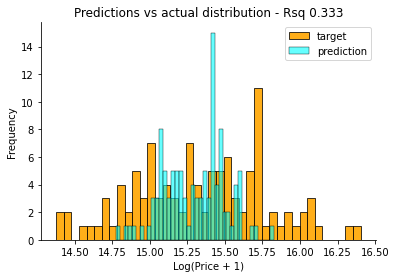

In [88]:
# Multiple OLS 

model = ols()

pred = train_eval(model, x_tr_.area, y_tr, x_ts_.area, y_ts)

We've examined simple linear regression just to get a feeling for the meaning of coefficients, we now know that it portray linear relationship between two variables and estimate how much of a change in one variable affect the other.

**<a href="#toc" style='color:#00ffff'>Table of contents</a>**

<a id='gd'></a>

### Gradient Decent (GD):

Imagine that you are lost in the mountains and have poor vision because of bad weather so you can't see where you are going. You came up with a [function](https://en.wikipedia.org/wiki/Function_(mathematics) to measure your altitude after each step you make, your goal is to take small steps in the direction that minimize this function so you eventually descended successfully (minimized function = lowest altitude).

Gradient descent is an iterative (repeated) optimization algorithm for finding a local minimum (lowest altitude) of a differentiable function (derivative exists at each input). The idea is to take repeated steps in the **opposite** direction of the gradient (vector of partial derivative), because this is the direction of steepest descent.

Confusing? Check the following essential terminologies:

- [Derivative](https://en.wikipedia.org/wiki/Derivative)

    - For a function with a single variable, it is the rate of change of the function with respect to that variable. Example: velocity is the derivative of the position of a moving object with respect to time, this measures how quickly the position of the object changes when time advances. The process of finding a derivative is called *differentiation*. 
    
- [Partial derivative](https://en.wikipedia.org/wiki/Partial_derivative)
   
    - For a function with multiple variables, it is the rate of change of the function with respect to **one** of those variables, while the others are held constant. Considering all partial derivatives simultaneously is, in many situation, the same as [total derivative](https://en.wikipedia.org/wiki/Total_derivative) (in which all variables are allowed to vary).
    
- [Gradient](https://en.wikipedia.org/wiki/Gradient)
   
    -  Is a vector composed of partial derivatives of a function at a given input, it can be interpreted as the "direction and rate of fastest increase". The direction of the gradient is the direction in which the function increases most quickly from the given input, and the magnitude of the gradient is the rate of increase in that direction. For a function with a single variable the gradient is the Derivative of that function.

Summary:

We can optimize a function by calculating the gradient at a given input, moving in the direction of the gradient maximizes the function as opposed to moving away from the gradient which minimizes it. In machine learning context, our goal is to minimize residuals (actual - predictions, aka loss function) which can be achieved by optimizing model parameters over several iterations taking steps in the opposite direction of the gradient; these steps are known as *learning rate* as we will see next.

### GD in Linear regression

The mathematical notation of update rule for a gradient decent algorithm of a function with two variables only (i.e.: simple linear regression) is

$\theta_{j}$ $:=$ $\theta_{j}$ - $\alpha$ $\frac{∂}{∂\theta_{j}}$$J$($\theta_0$, $\theta_1$)

where:

- $\theta_{j}$ parameter to optimize (i.e.: intercept/slope) 
- $:=$ assignment operator to overwrite old value with new one
- $\alpha$ learning rate (step size towards solution)
- $∂$ partial derivative
- $J$($\theta_0$, $\theta_1$) cost function to minimize

The term $\frac{∂}{∂\theta_{j}}$$J$($\theta_0$, $\theta_1$) measures the slope of line that is tangent to the cost function at the given $\theta$. Subtracting a fraction of that slope from $\theta$ ensures that we are moving towards lowest point (moving away from gradient) that minimize the cost function. We can visualize the optimization process of the algorithm using the below graph (cost function is on the left):
- The slope $\frac{∂}{∂\theta_{j}}$$J$($\theta_0$, $\theta_1$) represented by the dotted line is decreasing after updating $\theta$ at each iteration
- Cost function $J$($\theta_0$, $\theta_1$) on y axis is moving towards the lowest value (local minimum) at each iteration

<img class="aligncenter" src="https://drive.google.com/uc?id=1z0wVNOYoyFbguHSzuym4yNkDrXJCqPaX" width="700" height="700">


Steps towards solution:

- Start with an initial guess of model parameters (in our example will be zeros).
- keep changing the parameters a little bit to reduce the cost function and converge to local minimum (lowest possible value).

#### GD Simple linear regression

We'll use MSE as cost function to optimize for a simple linear regression problem

$J$($\theta_0$, $\theta_1$) = $\frac {1}{2n}$$\sum _{i=1}^{n}$($h$$\theta$($x_i$) - $y_i$)$^2$

Applying gradient decent to minimize cost function, we want to derive $\frac{∂}{∂\theta_{j}}$$J$($\theta_0$, $\theta_1$)

$\frac{∂}{∂\theta_{j}}$$.$$\frac {1}{2n}$$\sum _{i=1}^{n}$($h$$\theta$($x_i$) - $y_i$)$^2$

which can be further simplified to

$\frac{∂}{∂\theta_{j}}$$.$$\frac {1}{2n}$$\sum _{i=1}^{n}$($\theta_0$ + $\theta_1$$x_i$ - $y_i$)$^2$

resulting in the following two formulas (our model has only two parameters being the slope $\theta_1$ and intercept $\theta_0$)

$\frac{∂}{∂\theta_{0}}$$J$($\theta_0$, $\theta_1$) = $\frac {1}{n}$$\sum _{i=1}^{n}$($h$$\theta$($x_i$) - $y_i$)

$\frac{∂}{∂\theta_{1}}$$J$($\theta_0$, $\theta_1$) = $\frac {1}{n}$$\sum _{i=1}^{n}$($h$$\theta$($x_i$) - $y_i$)$x_i$

Substituting both parameters into gradient descent’s update rule

$\theta_{0}$ $:=$ $\theta_{0}$ - $\alpha$ $\frac {1}{n}$$\sum _{i=1}^{n}$($h$$\theta$($x_i$) - $y_i$)

$\theta_{1}$ $:=$ $\theta_{1}$ - $\alpha$ $\frac {1}{n}$$\sum _{i=1}^{n}$($h$$\theta$($x_i$) - $y_i$)$x_i$

where $\alpha$ is learning rate and it controls the step size at each iteration while moving toward the minimum of loss function.

#### GD Multiple linear regression

Since we have several variables we can express the cost function as follows

$J$($\theta$) = $\frac {1}{2n}$$\sum _{i=1}^{n}$($h$$\theta$($x_i$) - $y_i$)$^2$

$\theta$ is a vector of all parameters [$\theta_0$, $\theta_1$, .....$\theta_n$], GD's update rule would then be

$\theta_{j}$ $:=$ $\theta_{j}$ - $\alpha$ $\frac{∂}{∂\theta_{j}}$$J$($\theta$)

and for each $\theta$

$\theta_{0}$ $:=$ $\theta_{1}$ - $\alpha$ $\frac {1}{n}$$\sum _{i=1}^{n}$($h$$\theta$($x_i$) - $y_i$)$x_0^i$

$\theta_{1}$ $:=$ $\theta_{1}$ - $\alpha$ $\frac {1}{n}$$\sum _{i=1}^{n}$($h$$\theta$($x_i$) - $y_i$)$x_1^i$

.
.
.

$\theta_{n}$ $:=$ $\theta_{1}$ - $\alpha$ $\frac {1}{n}$$\sum _{i=1}^{n}$($h$$\theta$($x_i$) - $y_i$)$x_n^i$

we can see that all $\frac{∂}{∂\theta_{j}}$ are the same, which can be expressed as

$\frac {1}{n}$$X$$^t$($h$$\theta$($x_i$) - $y_i$)

Where

- $X$ is feature matrix
- $h$$\theta$($x_i$) - $y_i$ are residuals

So we are basically calculating dot product between feature values (columns) $X$$^t$ and residuals

Summary:

- Initiate the algorithm with random parameter estimates
- Calculate partial derivative of cost function
- Update parameters
- Repeat until converge

Notes:

- It is important to compute $\theta_j$ simultaneously (in parallel). This is the principle behind partial differential equations.

- If the step size is too large (using high value of learning rate) the optimization can diverge (miss) instead of converging (converge means that after each iteration, the output gets closer and closer to optimal solution). On the other hand, If the step size is too small the process can take too many iterations making the algorithm computationally expensive. 

- Gradient decent will produce same results as other closed form solutions we discussed earlier; however, it scales better with large datasets. Interesting discussion about this [here](https://stats.stackexchange.com/questions/278755/why-use-gradient-descent-for-linear-regression-when-a-closed-form-math-solution).

<a id='gds'></a>

In [89]:
# GD simple OLS from scratch

def gradient_descent(x, y, theta_0 = 0, theta_1 = 0, iters = 1000, learning_rate=0.01):
    
    x = np.array(x)
    y = np.array(y)
    
    # number of samples
    n = len(x)
    
    for i in range(iters):
        
        # predictions
        pred = theta_0 + (theta_1 * x) 
        
        # calculate gradients
        theta_0_gradient = (1/n) * sum(pred - y)
        theta_1_gradient = (1/n) * sum(x * (pred - y))
        
        # Update parameters, moving away from the gradient
        theta_0 = theta_0 - (learning_rate * theta_0_gradient)
        theta_1 = theta_1 - (learning_rate * theta_1_gradient)
        
    return theta_1, theta_0, pred

In [90]:
# Gradient decent - simple LR

# Scaling data
scaler = StandardScaler()

scaler.fit(train_set)

train_set_s = pd.DataFrame(scaler.transform(train_set), columns = train_set.columns)
test_set_s = pd.DataFrame(scaler.transform(test_set), columns = test_set.columns)

# estimate parameters
gd_lr = gradient_descent(train_set_s.area, train_set_s.price, iters=1000, learning_rate=0.01)

# predict and evaluate
pred = gd_lr[0] * test_set_s.area

r_scr = r2_score(np.array(test_set_s.price), pred).round(3)

print('r2: ' , r_scr.round(3) , '\n', 'coefficient: ', np.round(gd_lr[0], 2), sep = '')

r2: 0.333
coefficient: 0.58


Gradient decent is sensitive to scale, that’s why we scaled the data before applying the algorithm. Fitting scaler on training set only to prevent [lekage](https://en.wikipedia.org/wiki/Leakage_(machine_learning))

In [91]:
# linear regression - sklearn

model_sk = LinearRegression()

model_sk.fit(np.array(train_set_s.area).reshape(-1,1), np.array(train_set_s.price))

pred = model_sk.predict(np.array(test_set_s.area).reshape(-1,1))

r_scr = r2_score(np.array(test_set_s.price), pred).round(3)

print('r2: ' , r_scr.round(3) , '\n',
      'coefficient: ', model_sk.coef_[0].round(2), sep = '')

r2: 0.333
coefficient: 0.58


<a id='gdm'></a>

In [92]:
# GD multiple OLS from scratch
       
def gradient_descent_multiple(x , y, learning_rate, iterations):
    
    x = np.array(x)
    y = np.array(y)
    
    # number of samples
    n = len(x)
        
    ones = np.ones(x.shape[0])
    x = np.column_stack([ones, x])

    # initiation of model parameters
    w = np.zeros(x.shape[1])

    for i in range(iterations):

        residuals = x.dot(w) - y
        
        # partial derivative vector
        grad = (1/n) * x.T.dot(residuals)
        
        # update weights
        w = w - learning_rate * grad

    return w

In [93]:
# Gradient decent - multiple LR

# Selecting features and adding intercept
X = train_set_s[['area', 'bedrooms']].copy()
Y = train_set_s['price'].copy()

gdm_df = gradient_descent_multiple(X, Y, 0.01, 1000)

pred = gdm_df[0:1] + X.dot(gdm_df[1:])

r_scr = r2_score(Y, pred).round(3)

print('r2: ' , r_scr.round(3) , '\n',
      'coefficient: ', np.round(gdm_df[1:], 2), sep = '')

r2: 0.416
coefficient: [0.53 0.29]


In [94]:
# linear regression - sklearn

model_sk = LinearRegression()

model_sk.fit(X, Y)

pred = model_sk.predict(X)

r_scr = r2_score(Y, pred).round(3)

print('r2: ' , r_scr.round(3) , '\n',
      'coefficient: ', model_sk.coef_.round(2), sep = '')

r2: 0.416
coefficient: [0.53 0.29]


Both gradient decent optimization and closed form solution provide same results.

**<a href="#toc" style='color:#00ffff'>Table of contents</a>**

<a id='bs'></a>

### Bayes' theorem

We'll be ending our discussion with a very interesting way for estimating model parameters using Bayesian inference. We'll first introduce [Bayes' theorem](https://en.wikipedia.org/wiki/Bayes'_theorem) to be familiar with the terminologies used ahead, In a nutshell Bayes' rule stats that:

$P(H|E)$ = $\frac{P(E|H)P(H)}{P(E)}$

where
- $H$: hypothesis ($y$ aka target values)
- $E$: evidence ($x$ aka features)
- $P(H|E)$: [conditional probability](https://en.wikipedia.org/wiki/Conditional_probability) (aka posteriori), it is the probability of hypothesis *given* evidence
- $P(H)$: probability of hypothesis without evidence (aka priori), same goes for $P(E)$.

The denominator is usually excluded resulting in 

$P(H|E)$ $\alpha$ $P(E|H)P(H)$ 

Which means that the posteriori $P(H|E)$ is proportional ($\alpha$) to the likelihood $P(E|H)$ times the priori $P(H)$.

In [95]:
# Demonstrating Bayes therom

# load data
bys_df = pd.read_csv('play_tennis.csv').drop('day', axis =1)

# Categorical to numeric features
bys_df = pd.get_dummies(bys_df ,columns = bys_df.columns[:-1] , prefix = '')

bys_df.play = bys_df.play.map({'Yes':1, 'No':0})

# remove space and special charecters from column names
bys_df.columns = bys_df.columns.str.strip('' '|_')

print('Total samples: ', bys_df.shape[0])

bys_df.head()

Total samples:  14


,play,Overcast,Rain,Sunny,Cool,Hot,Mild,High,Normal,Strong,Weak
0,0,0,0,1,0,1,0,1,0,0,1
1,0,0,0,1,0,1,0,1,0,1,0
2,1,1,0,0,0,1,0,1,0,0,1
3,1,0,1,0,0,0,1,1,0,0,1
4,1,0,1,0,1,0,0,0,1,0,1


The data consists of 14 days each represents game status (play or no play) which is the target variable we want to predict given weather conditions (features).

In [96]:
# Target mean aka hypothesis aka priori aka unconditional probability of event
bys_df.play.value_counts(normalize = True).round(2)

1    0.64
0    0.36
Name: play, dtype: float64

In [97]:
# Likelihood of evidence
bys_df.groupby('play')[bys_df.columns[1:]].mean().round(2)

,Overcast,Rain,Sunny,Cool,Hot,Mild,High,Normal,Strong,Weak
play,,,,,,,,,,
0,0.00,0.40,0.60,0.20,0.40,0.40,0.80,0.20,0.60,0.40
1,0.44,0.33,0.22,0.33,0.22,0.44,0.33,0.67,0.33,0.67


In [98]:
# predicting play status given the following weather data

# Rain, Mild, Normal, Weak
print('Play likelihood: ', round(.33*.44*.67*.67*.64, 3), '\n', 'No-play likelihood: ', round(.4*.4*.2*.4*.36 ,3),  '\n',  
      'Play probability: ', round(.33*.44*.67*.67*.64 / (.33*.44*.67*.67*.64 + .4*.4*.2*.4*.36), 2), sep = '')

Play likelihood: 0.042
No-play likelihood: 0.005
Play probability: 0.9


Let’s consider the following weather data (Rain, Mild, Normal, and Weak) as evidence for which we want to predict play status:

- Play/No-play is the hypothesis
- Weather conditions are evidence
- $P$(play) = 0.64
- $P$(no-play) = 0.36
- $P$(evidence |play) = .33 * .44 * .67 * .67
- $P$(evidence | no-play) = .4 * .4 * .2 * .4
- $P$(play | evidence) = P (evidence | no-play) * P (play) = 0.065 * 0.64 = 0.042

If we want to make inference whether a game is gonna be played given these evidence, we normalize play likelihood as follows:

- $\frac{P(play | evidence)}{P(play | evidence) + P(no-play | evidence)}$ = 0.042 / (0.042 + 0.005) = 0.9

So our prediction would be 'play' given this evidence.

Summary:

- Priori: our initial belief about an event
- Posteriori: our updated belief after observing evidence
- Likelihood: joint probability of evidence given a hypothesis

Armed with an understanding of Bayes rule we are ready to discuss Bayesian linear regression next.

**<a href="#toc" style='color:#00ffff'>Table of contents</a>**

<a id='blr'></a>

### Bayesian linear regression:

Previously, we discussed linear regression where we calculated model parameters $\theta$ as point estimates (single value) and this enabled making point predictions of $y$ values; this approach is known as [Frequentist inference](https://en.wikipedia.org/wiki/Frequentist_inference). [Bayesian linear regression](https://en.wikipedia.org/wiki/Bayesian_linear_regression) does not attempt to compute point estimates, rather the full posteriori distribution of the parameters is taken into account when making predictions; estimating $y$ values using the average of this distribution. Having a distribution of parameters instead of a single value gives an idea about the uncertainty of the model.

I've studied different sources discussing Bayesian linear regression; it's a dense topic with many components to consider. The following can be considered as a gentle introduction to the topic in a bullet point summary of both theoretical and practical aspects, followed by worked examples to fit everything together. 

In Frequentist approach, target values are modeled as

$y$ = $X$$\theta$ + $ε$

Using OLS we calculate $\theta$

$\theta$ = ($X^{t}$$X$)$^{-1}$$X^{t}$$y$

In Bayesian linear regression, target values are modeled as 

$y$ ~ $N$($X$$\theta$, $\sigma^2$)

which means that $y$ is a random variable (or vector) of which each element (data point) is distributed according to a Normal distribution, the mean of this normal distribution is linear model $X$$\theta$ with variance $\sigma^2$. We first define our model as follows

p($\theta$) = $N$($\mu_0$, $S_0$)

p($Y$|$X$, $\theta$) = $N$($Y$|$X$$\theta$, $\sigma^2$$I$)

Where:

- p($\theta$) is prior belief about model parameters, we'll assume that it is normally distributed with mean $\mu_0$ and [covariance matrix](https://en.wikipedia.org/wiki/Covariance_matrix) $S_0$

- p($Y$|$X$, $\theta$) is assumed to be Gaussian too with mean $X$$\theta$ and covariance matrix $\sigma^2$$I$ where $I$ is identity matrix (so it is basically the variance across the diagonal).

After setting up our probabilistic model, we compute the posteriori distribution of model parameters $\theta$ using Bayes’ theorem as

p($\theta$|$X$, $Y$) = $\frac{p(Y|X, \theta)p(\theta)}{p(Y|X, \theta)}$

Where

- $X$ all features

- $Y$ corresponding labels

- p($Y$|$X$, $\theta$) is likelihood $N$($Y$|$X$$\theta$, $\sigma^2$$I$)

- p($\theta$) is priori $N$($\mu_0$, $S_0$)

The parameter posteriori distribution can be calculated using closed form solutions as follows

p($\theta$|$X$, $Y$) = $N$($\theta$|$\mu_N$, $S_N$)

**eq.1:** $\mu_N$ = $S_N$($S_0^{-1}$$\mu_0$ + $\sigma^{-2}$$X^{t}$$y$)

**eq.2:** $S_N$ = ($S_0^{-1}$ + $\sigma^{-2}$$X^{t}$$X$)$^{-1}$

Where $\sigma^{-2}$ is the [precision](https://en.wikipedia.org/wiki/Precision_(statistics)) which is inversely related to the noise variance $\sigma^2$ (1 / $\sigma^2$) and the subscript $_N$ indicates the size of the data set. We are not gonna discuss the derivation of $\mu_N$ and $S_N$ rather focus on the implementation aspect for which this is all we need to know.

Finally, to make predictions at an input $x_i$, we [integrate](https://en.wikipedia.org/wiki/Integral) out $\theta$ and obtain

p($y_i$|$X$,$Y$,$x_i$) = $\int p(y_i|x_i, \theta)p(\theta|X, Y)\mathrm{d}\theta$

Where

- $\int$ represents integration
- $\mathrm{d}\theta$ is [differential](https://en.wikipedia.org/wiki/Differential_(mathematics)) which indicates that the variable of integration is $\theta$ 

We obtain posteriori predictive distribution using closed form solution as

**eq.3:** p($y_i$|$X$,$Y$,$x_i$) = $N$($x_i$$m_N$, $x_i$$S_N$$x_i$$^t$ + $\sigma^2$)

#### Summary of the steps we are gonna use in implementing the model:

- Step 1: Define a probability distribution for both priori p($\theta$) and likelihood p($Y$|$X$, $\theta$)
 
- Step 2: Apply Bayes theorem and calculate posteriori distribution of model parameters using equation 1 and 2

- Step 3: Obtain posteriori predictive distribution using equation 3

#### Notes:

- If the distribution of both priori and likelihood are the same they are referred to as being [Conjugate prior](https://en.wikipedia.org/wiki/Conjugate_prior), where closed form (analytical) solution exists for updating model parameters (Example eq.1, 2 and 3). However, if both distributions are not compatible with each other then we resort to using approximation methods such as [MCMC](https://en.wikipedia.org/wiki/Markov_chain_Monte_Carlo).

<a id='blrs'></a>

In [99]:
# Bayesian regression from scratch

class blr():
    def __init__(self, m_0, s_0, sigma_sq):
        """ Define a probability distribution for both priori """

        self.m_0 = m_0 # param priori mean
        
        self.s_0 = s_0 # param priori covariance matrix
        
        self.prior = multivariate_normal(m_0, s_0) # initialize the prior distribution p(\theta)
    
        self.sigma_sq = sigma_sq # noise variance (sigma^2) assumed to be known
    
        self.precision = 1 / sigma_sq # precision 1/sigma^2
        
        # Posteriori = Priori before seeing any evidence
        self.post_cov = self.s_0 # S_N in eq.2
                
        self.post_mean = self.m_0  # m_N in eq.1
                
        self.post_param = self.prior # posteriori distribution
        
    def fit(self, x, y):
        """ update posteriori: equation 1 and 2 """
        
        x = self.transform_(x) # prepare x
        
        inv_s_0 = np.linalg.inv(self.s_0) # S_0^-1
        
        # equation 2
        XTX = x.T.dot(x)
        self.post_cov = np.linalg.inv(inv_s_0 + self.precision * XTX)
        
        # equation 1
        self.post_mean = self.post_cov.dot(inv_s_0.dot(self.m_0) + self.precision * x.T.dot(y))
        
        # Update the posterior distribution
        self.post_param = multivariate_normal(self.post_mean.flatten(), self.post_cov)
        
        # display results
        try:
            len(self.cols) != 0
            
            feature_weight = f'Intercept = {self.post_mean[0].round(2)} , '

            for i, col in enumerate(self.cols):
                feature_weight += f'{col} = {self.post_mean[i+1].round(2)} , '

            print(feature_weight)
            
        except:
            pass
        
    def predict(self, x):
        """ equation 3 """
        
        x = self.transform_(x)
        
        pred_mean = x.dot(self.post_mean)  # \$x_i$$m_N$
        pred_cov = x.dot(self.post_cov.dot(x.T)) + self.sigma_sq # $x_i$$S_N$$x_i$$^t$ + $\sigma^2$
        
        # Define posteriori distribution
        post_pred = norm(loc = pred_mean.flatten(), scale = pred_cov)
        
        return post_pred
        
    def transform_(self, x):
        """ adding intercept """
        
        try:
            x.values
            self.cols = x.columns
            x = np.array(x)
        except:
            x = np.array(x)
        
        ones = np.ones(x.shape[0])
        x = np.column_stack([ones, x])
        return x

In [100]:
# Initialize priors assuming normal distribution
n_features = X.shape[1]
m_0 = np.zeros(n_features + 1) # +1 to account for intercept
s_0 = np.identity(n_features + 1)
sigma_sq = 0.2 # assumed to be known

# Step 1: Define a probability distribution for both priori and likelihood
model_blr = blr(m_0, s_0, sigma_sq)

# Step 2: Apply Bayes theorem and calculate posteriori distribution 
model_blr.fit(X, Y)

Intercept = -0.0 , area = 0.53 , bedrooms = 0.29 , 


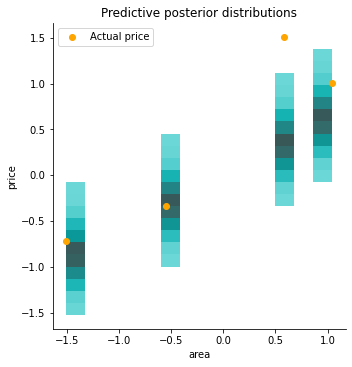

In [101]:
# Step 3: Obtain predictive distribution using equation 3

# using single feature for ease of visualization 
n_features = X[['area']].shape[1]

# Initialize priors
m_0 = np.zeros(n_features + 1) 
s_0 = np.identity(n_features + 1) 
sigma_sq = 0.2

model_blr_vis = blr(m_0, s_0, sigma_sq) # step 1

model_blr_vis.fit(X.area.values, Y.values) # step 2

pred_data = []    # saving results for visualization
sample_size = 1000  # n samples to be drawn from posteriori predictive distribution 
feats_test = list(X.area[0:4].values) # features
labels_test = Y[0:4] # labels

for feat in feats_test:
    # step 3
    post_pred = model_blr_vis.predict([feat])
    # random sample from the distribution defined in step 3
    label_dist = post_pred.rvs(size = sample_size, random_state = 42)
    # save results
    for label in label_dist:
        pred_data.append([feat, label])

# visualize
pred_df = pd.DataFrame(pred_data, columns=['area', 'price'])
sns.displot(x = pred_df.area, y = pred_df.price, color = 'cyan')
plt.scatter(x = feats_test, y = labels_test, color = 'orange', label = 'Actual price')
plt.title("Predictive posterior distributions")
plt.legend();

When it comes to making predictions we attempt to estimate the density of the random variable (sample) as follows:

- Estimate mean and variance using the test sample via equation 3
- Define distribution using the estimated mean and variance above (post pred)
- Generate random sample from the distribution and compare to actual value of test feature, samples closer to the mean are drawn more frequently than those far away.

Cyan colored intervals represent posteriori distribution of predicted house price and orange dots are the actual price, we'd typically want the center of the distribution (frequently drawn samples) to match the actual price which is not the case for some samples indicating high degree of uncertainty in predictions.

While the estimated parameters are essentially the same as those from OLS (peak of param distribution is equivalent to point estimate of OLS), there are two critical advantages of Bayesian estimation:

- We can quantify any prior knowledge we might have by placing priors on the parameters. For example, if we think that $\sigma$  Is likely to be small we would choose a prior with more probability mass on low values.

- We do not get a single estimate of $\theta$ as in OLS but instead a complete posterior distribution about how likely different values of $\theta$ are. For example, with few data points our uncertainty in $\theta$ will be very high and we’d be getting very wide posteriors distribution.

**<a href="#toc" style='color:#00ffff'>Table of contents</a>**

<a id='mcmc'></a>

### MCMC Sampling

We've been using closed form solution for estimating posteriori distribution because our chosen priors were Conjugate; which becomes challenging when both distribution do not match there we turn to another method for approximating posteriori distribution using MCMC sampling algorithm.

We will not change our prior distribution so we expect that results match those obtained earlier.

In [102]:
# Linear formula
formula = 'price ~ ' + ' + '.join(['%s' % variable for variable in train_set_s.columns[1:3]])

formula

'price ~ area + bedrooms'

Instead of defining probability distributions for each of the model parameters separately, we pass in an R-style formula that map features (input) to target (output) where the symbol *'~'* means *'is a function of'*. 

We are telling the model that price is a linear combination of the chosen features (area and bedrooms).

##### Notes:

- I'm using only two features for ease of demonstration and comparability across different approaches for estimating parameters.

In [103]:
# initialize model
mcmc_model = bmb.Model(formula, train_set_s[['price', 'area', 'bedrooms']])
mcmc_model.build()

The model takes a formula from which it creates a design matrix ($X$) then adds random variables for each of the coefficients, an appropriate likelihood (Normal is chosen by default) and all other variables (sigma). Finally, initializes the parameters to a good starting point by estimating a Frequentist linear model using statsmodels.

Let’s visualize priori before fitting.

Sampling: [Intercept, area, bedrooms, price_sigma]


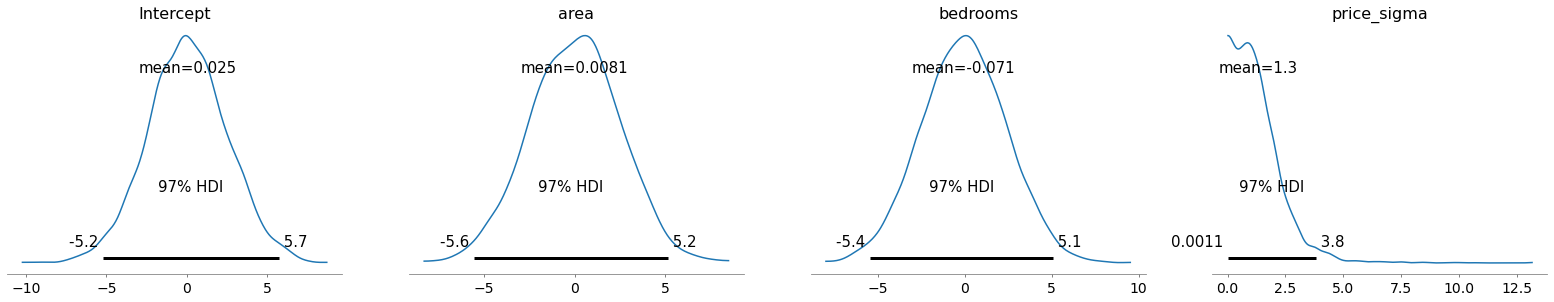

In [104]:
# plot priors
mcmc_model.plot_priors(random_seed=42, hdi_prob = 0.97);

For each model parameter a prior is initialized following the chosen distribution (normal in our example). All the values inside the HDI have higher probability density (i.e., credibility) than any value outside. The HDI therefore includes the most credible values.

In [105]:
# fit model
m_data = mcmc_model.fit(draws = 2000, random_seed = 42)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [Intercept, area, bedrooms, price_sigma]


Sampling 2 chains for 1_000 tune and 2_000 draw iterations (2_000 + 4_000 draws total) took 143 seconds.


Fitting can take a while, because there were two chains of Markov Chain Monte Carlo (MCMC) sampling the posterior probability density function. You can tell there are two chains from the printed output ('Sampling 2 chains ...'). These are two independent estimators of the posterior and are expected to agree to a fair degree. They ran for 1000 tuning steps first, which gives the walkers the chance to find the region of high posterior probability density. Then another 2000 steps were taken by each walker in that region to properly sample the complete posterior.

*m_data* is essentially our model because it contains all the data we need to perform inference. Now we can examine the posterior distribution of model parameters (i.e. the joint distribution of model parameters conditional on the data).

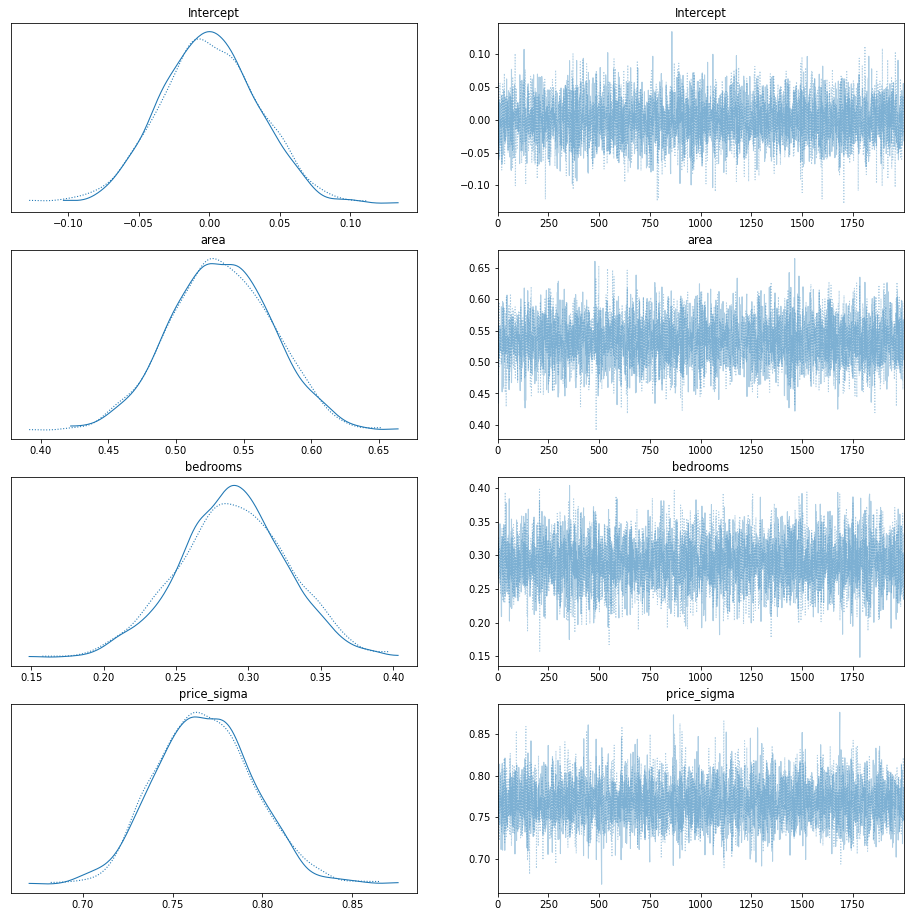

In [106]:
# param posteriori
fig = az.plot_trace(m_data, figsize=(16,16))

Traceplot shows the marginal posterior [Probability density function](https://en.wikipedia.org/wiki/Probability_density_function) (PDF) for all stochastic (random) variables on the left. The two lines are for the two chains as two independent Markov Chains were used to sample the posterior. 

The progression of the samples drawn 'traces' is shown on the right, which describe variations in the value of the variables during sampling. We'd want traces to be flat and fuzzy, not bending up or down and no 'flat' regions without variations; if existed would indicate that there were issues during sampling.

We can see that our model parameters are not point estimates rather distributions. The mean of each distribution can be taken as the most likely estimate.

In [107]:
# summary statistics
az.summary(m_data)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,-0.000,0.035,-0.064,0.064,0.0,0.001,5988.0,3460.0,1.0
area,0.533,0.037,0.464,0.604,0.0,0.000,5740.0,3250.0,1.0
bedrooms,0.289,0.037,0.219,0.360,0.0,0.000,5651.0,3203.0,1.0
price_sigma,0.768,0.027,0.721,0.819,0.0,0.000,6511.0,3311.0,1.0


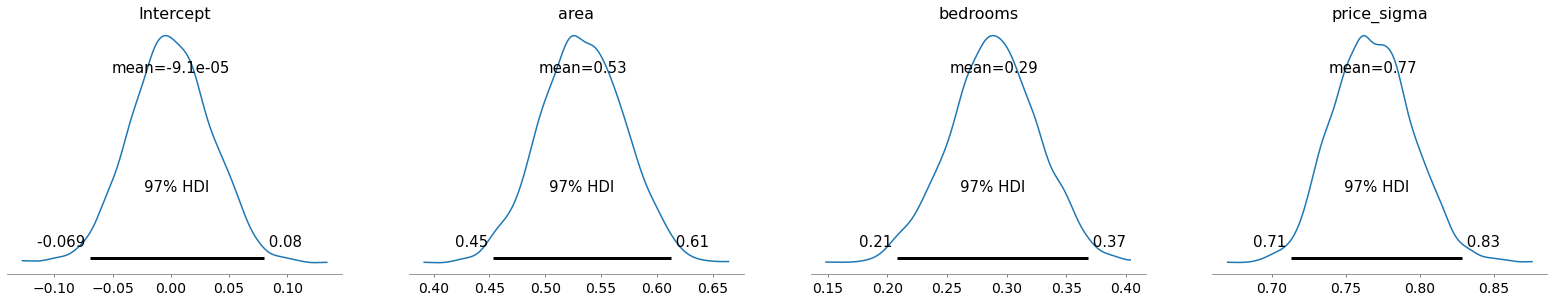

In [108]:
# visualize posteriori distribution 
az.plot_posterior(m_data, hdi_prob=0.97);

Summary statistics coupled with visualizing posteriori distribution gives us an estimation of model uncertainty. For example, the *'area'* feature has a 97% highest density interval (hdi) that goes from  0.45 to 0.61 which can be interpreted as *there is 97% probability that our updated belief is between 0.45 and .61 for the mean area parameter*.

I personally find it more appealing to examine model parameters this way.

<a id='capm'></a>

### Capital Asset Pricing Model (CAPM)

If you’re coming from a finance background you'd be familiar with the term *WACC* (weighted average cost of capital), it is basically a rate used in discounting *unlevered free cash flow* when performing company valuation and financial modeling. One of the components for calculating *WACC* is *Cost of equity* that can be estimated using *CAPM* defined as follows: 

CAPM = Risk free rate of return + Beta (Market Risk Premium) 

After the discussion we had here you probably guessed that Beta is $\beta$. It measure how an individual asset moves (on average) when the overall stock market increases or decreases and is estimated via closed form solution discussed in simple linear regression.

**<a href="#toc" style='color:#00ffff'>Table of contents</a>**